In [1]:
from impl.GraphRetriever import GraphRetriever

URI = "bolt://localhost:7687"
AUTH = ("neo4j", "password")

graphRetriever = GraphRetriever(URI, AUTH)

In [ ]:
import time 

start = time.time()
graphRetriever.load_graph()
end = time.time()
print(f"Required time is {str(end - start)} s.")

Start loading the graph
Start loading node types


In [48]:
graphRetriever.node_types

['Disease',
 'Tissue',
 'Biological_process',
 'Molecular_function',
 'Cellular_component',
 'Modification',
 'Phenotype',
 'Experiment',
 'Experimental_factor',
 'Units',
 'Chromosome',
 'Gene',
 'Transcript',
 'Protein',
 'Amino_acid_sequence',
 'Peptide',
 'User',
 'Project',
 'Subject',
 'Biological_sample',
 'Analytical_sample',
 'Modified_protein',
 'Clinical_variable',
 'Complex',
 'Food',
 'Known_variant',
 'Clinically_relevant_variant',
 'Publication',
 'Functional_region',
 'Metabolite',
 'Protein_structure',
 'GWAS_study',
 'Pathway',
 'Drug']

In [57]:
import matplotlib.pyplot as plt

def plot_in_out_degree_distributions(edge_index, dataset_name):
    """
        Note: It would be easy to do various kinds of powerful network analysis using igraph/networkx, etc.
        I chose to explicitly calculate only the node degree statistics here, but you can go much further if needed and
        calculate the graph diameter, number of triangles and many other concepts from the network analysis field.

    """
        []
    assert isinstance(edge_index, np.ndarray), f'Expected NumPy array got {type(edge_index)}.'

    # Store each node's input and output degree (they're the same for undirected graphs such as Cora)
    in_degrees = np.zeros(edge_index[1].max()+1, dtype=np.int64)
    out_degrees = np.zeros(edge_index[0].max()+1, dtype=np.int64)

    # Edge index shape = (2, E), the first row contains the source nodes, the second one target/sink nodes
    # Note on terminology: source nodes point to target/sink nodes
    num_of_edges = edge_index.shape[1]
    for cnt in range(num_of_edges):
        source_node_id = edge_index[0, cnt]
        target_node_id = edge_index[1, cnt]

        out_degrees[source_node_id] += 1  # source node points towards some other node -> increment its out degree
        in_degrees[target_node_id] += 1  # similarly here

    hist = np.zeros(np.max(out_degrees) + 1)
    for out_degree in out_degrees:
        hist[out_degree] += 1

    in_hist = np.zeros(np.max(in_degrees) + 1)
    for in_degree in in_degrees:
        in_hist[in_degree] += 1

    fig = plt.figure(figsize=(12,8), dpi=100)  # otherwise plots are really small in Jupyter Notebook
    fig.subplots_adjust(hspace=0.6)

    plt.subplot(411)
    plt.plot(in_degrees, color='red')
    plt.xlabel('node id'); plt.ylabel('in-degree count'); plt.title('Input degree for different node ids')

    plt.subplot(412)
    plt.plot(out_degrees, color='green')
    plt.xlabel('node id'); plt.ylabel('out-degree count'); plt.title('Out degree for different node ids')

    plt.subplot(413)
    plt.semilogy(hist, color='blue')
    plt.xlabel('node degree')
    plt.ylabel('# nodes for a given out-degree') 
    plt.title(f'Node out-degree distribution for {dataset_name} dataset')
    plt.grid(which="both")
    # plt.xticks(np.arange(0, len(hist), 5.0))

    plt.subplot(414)
    plt.semilogy(in_hist, color='blue')
    plt.xlabel('node degree')
    plt.ylabel('# nodes for a given in-degree') 
    plt.title(f'Node in-degree distribution for {dataset_name} dataset')
    # plt.xticks(np.arange(0, len(hist), 5.0))
    plt.grid(which="both")

    plt.grid(True)
    plt.show()

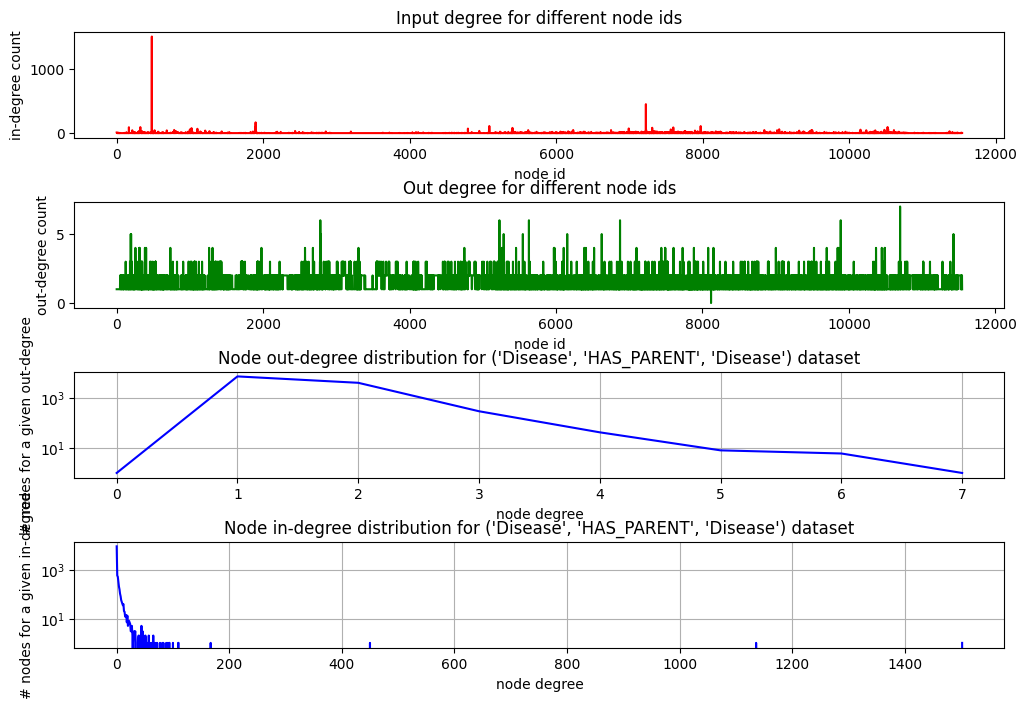

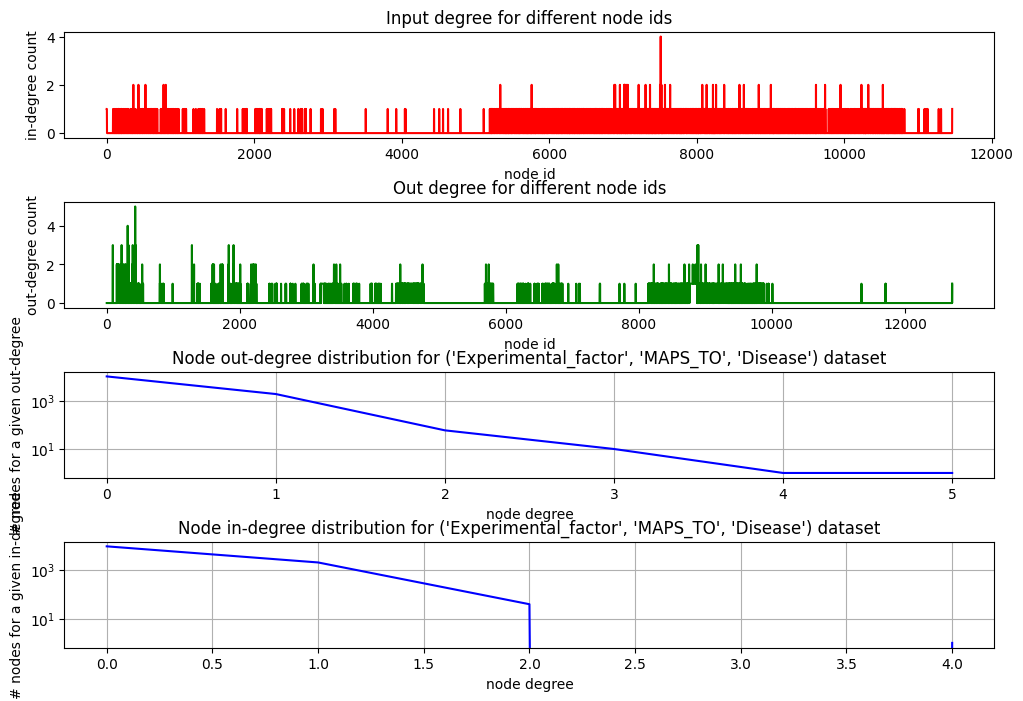

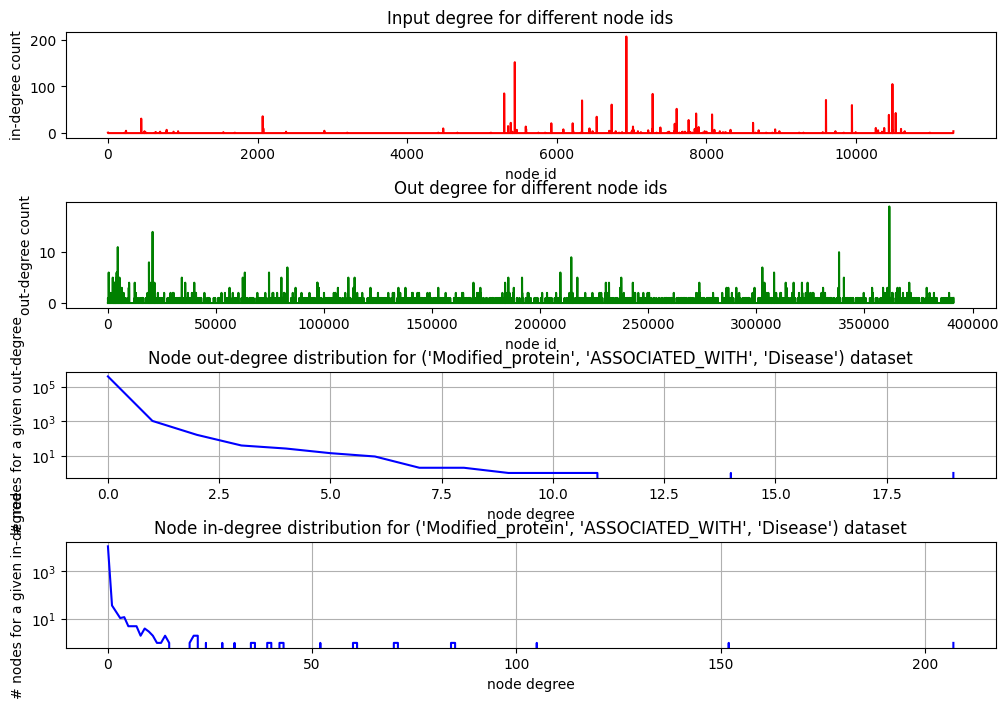

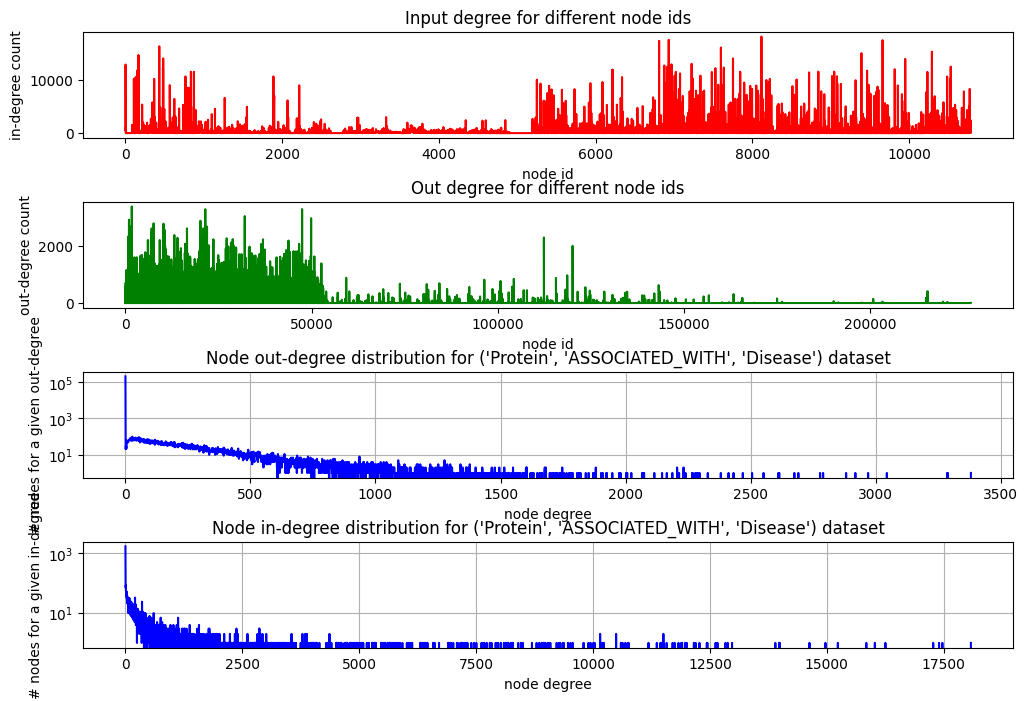

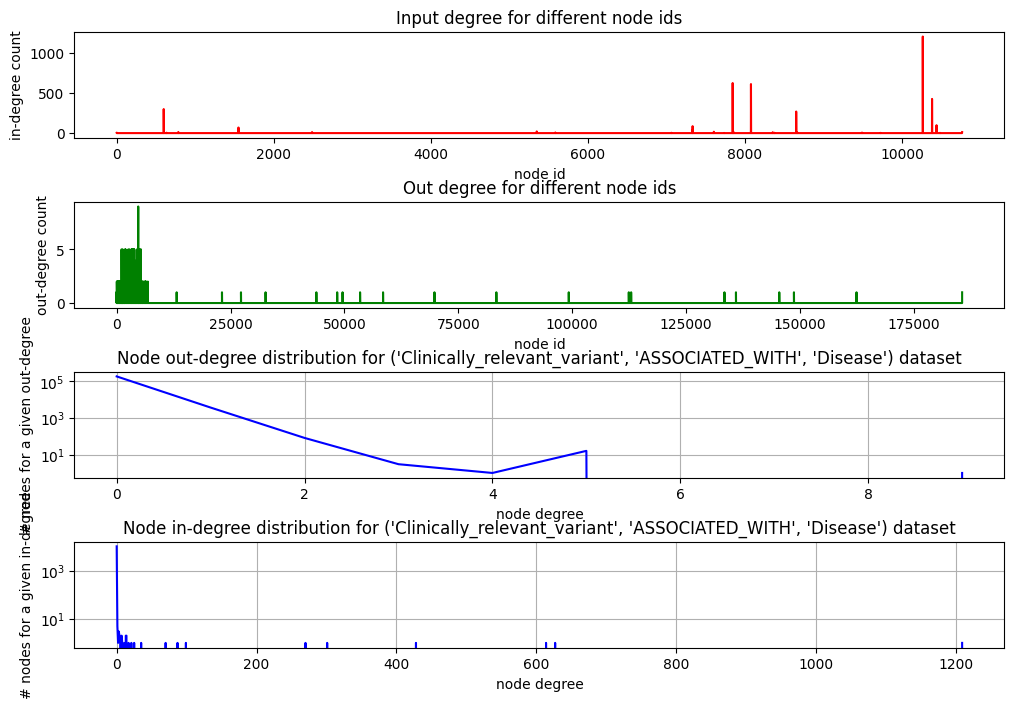

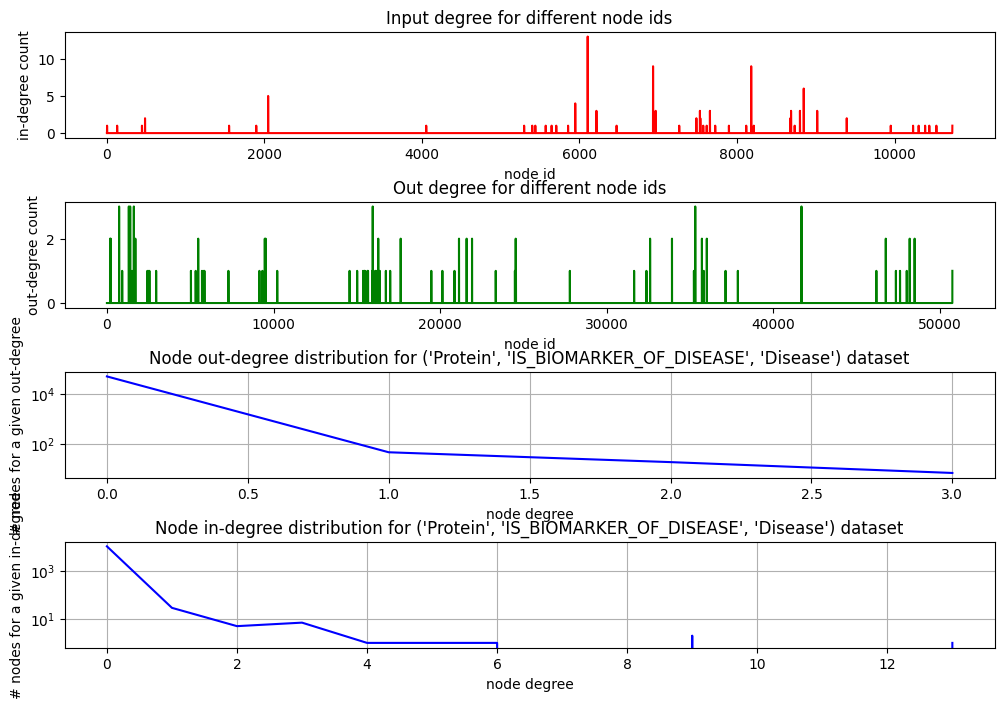

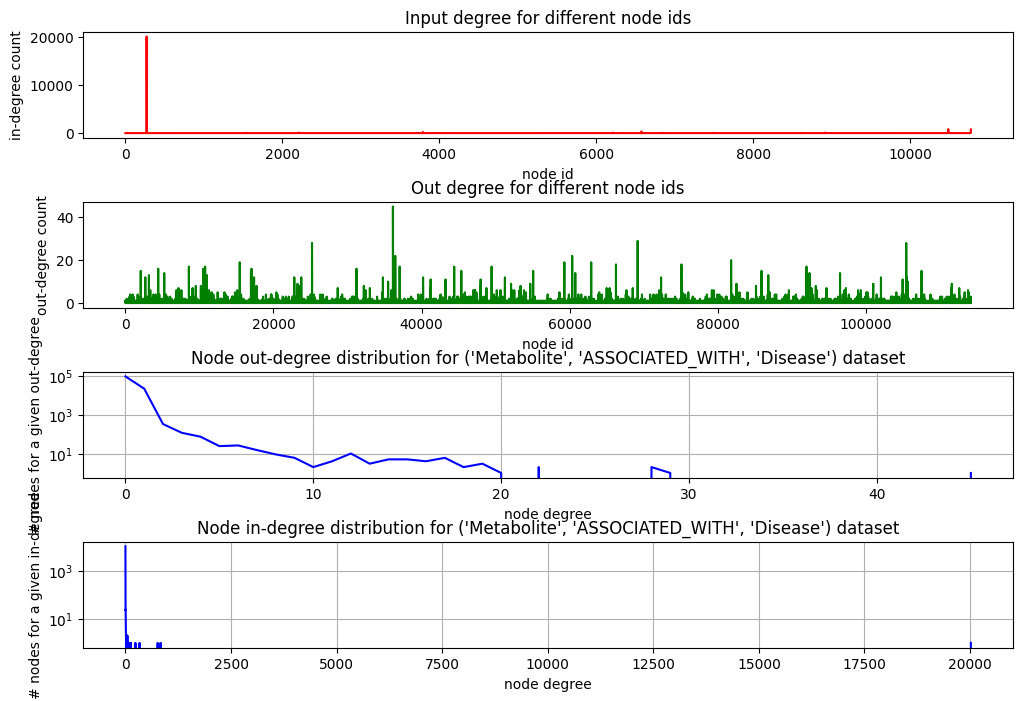

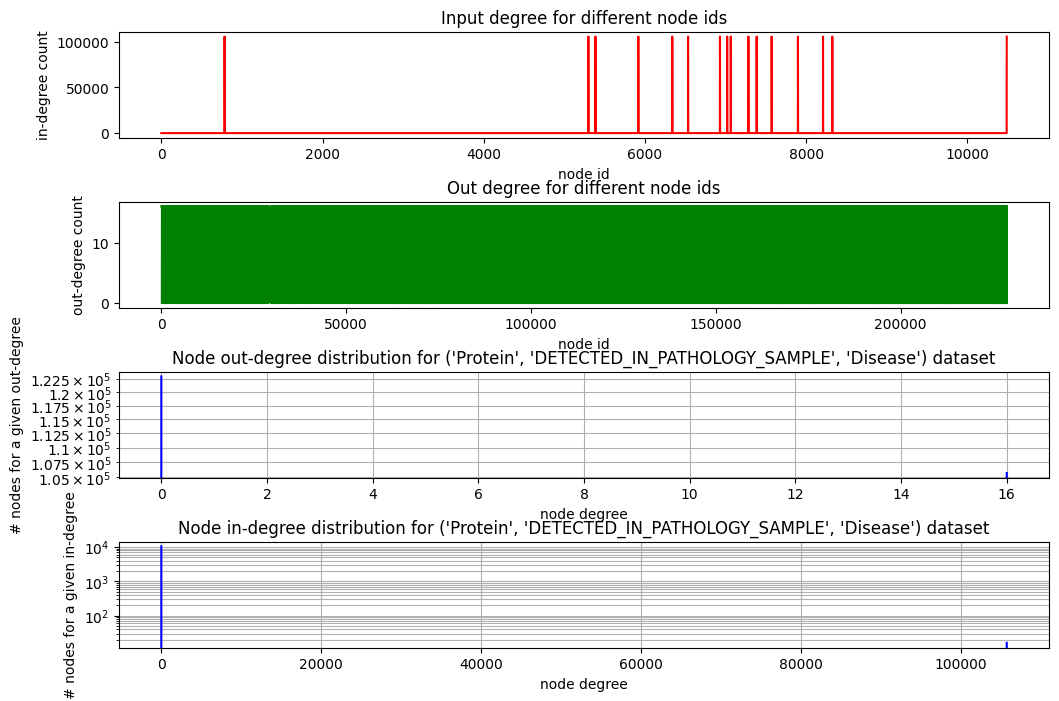

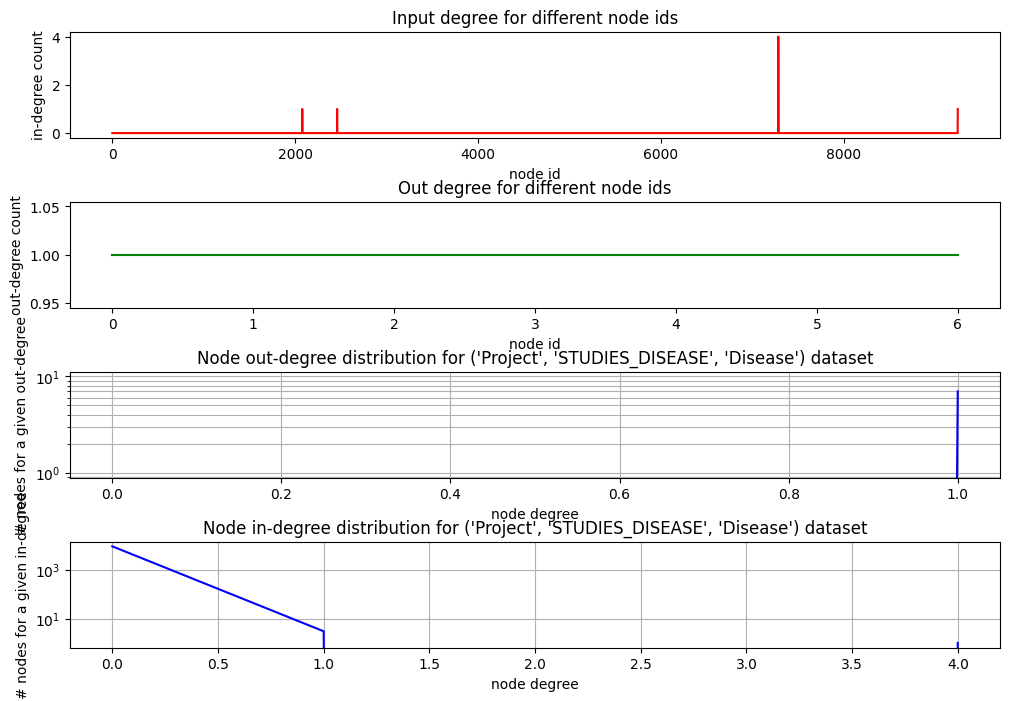

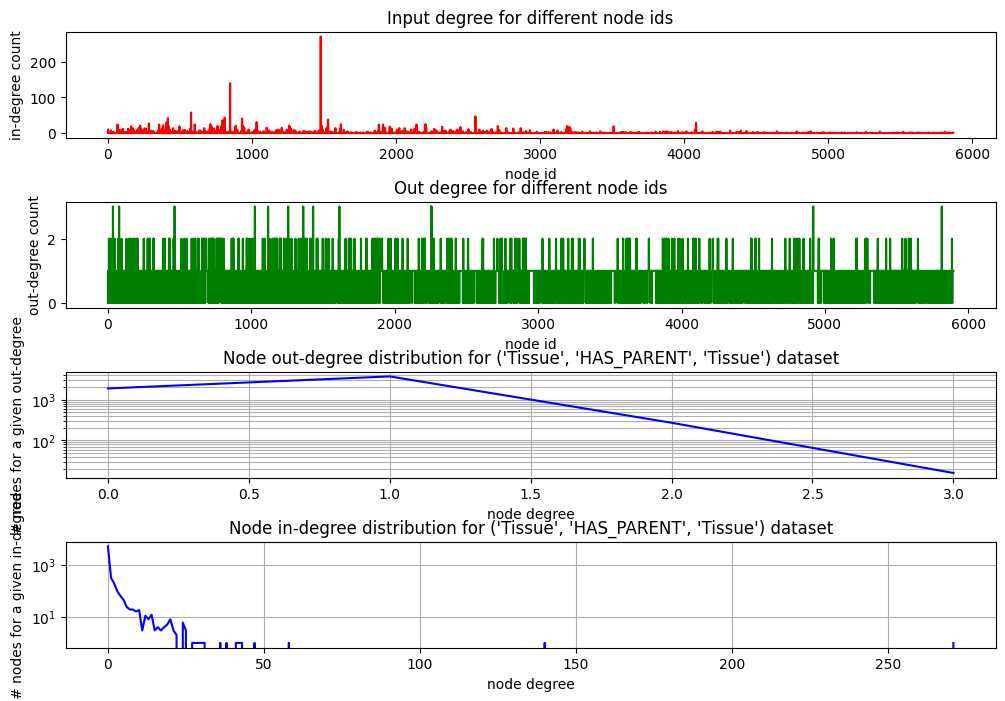

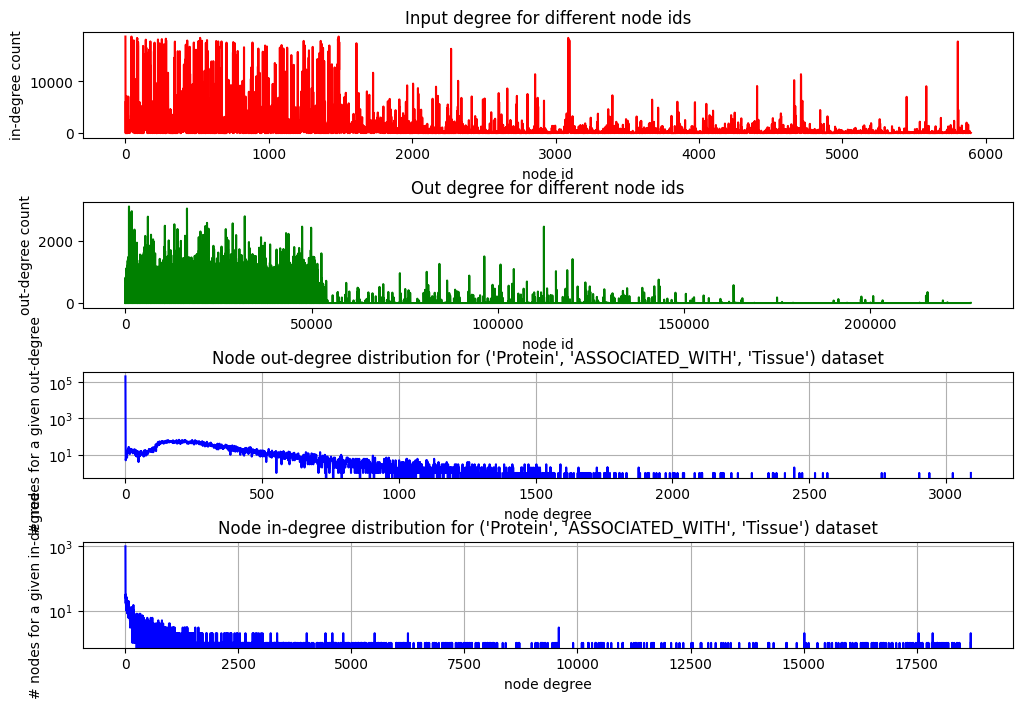

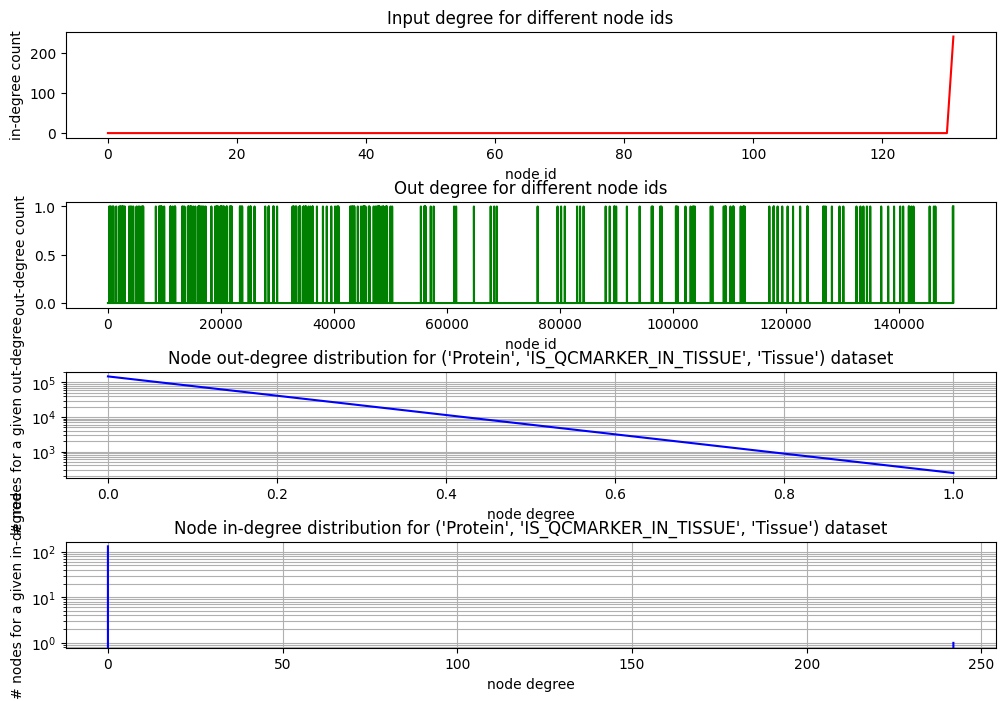

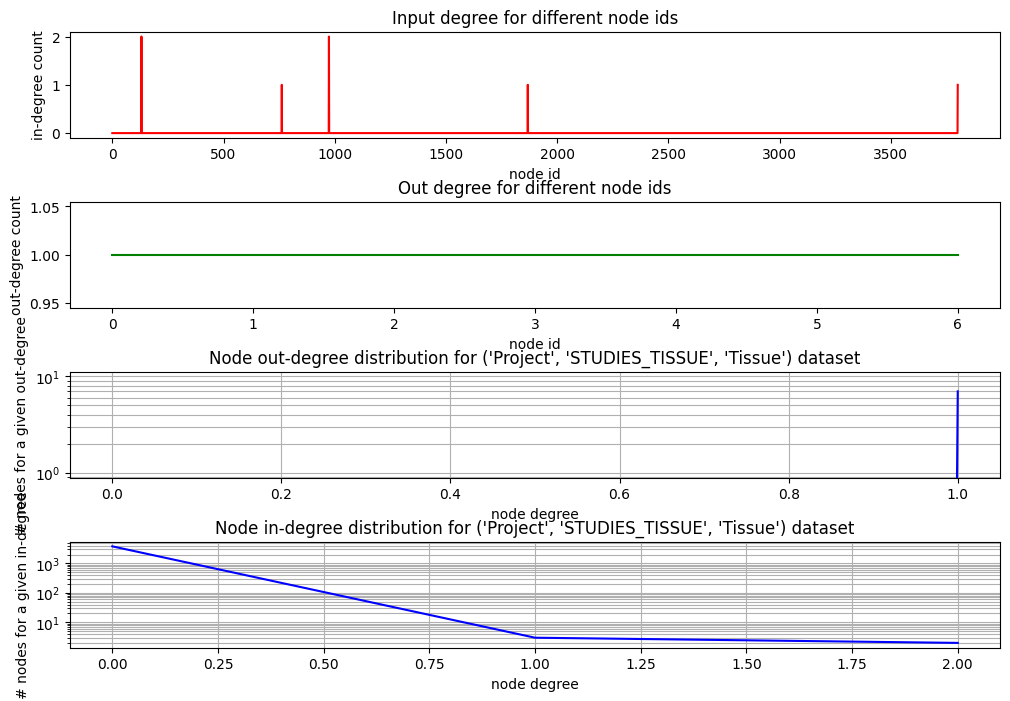

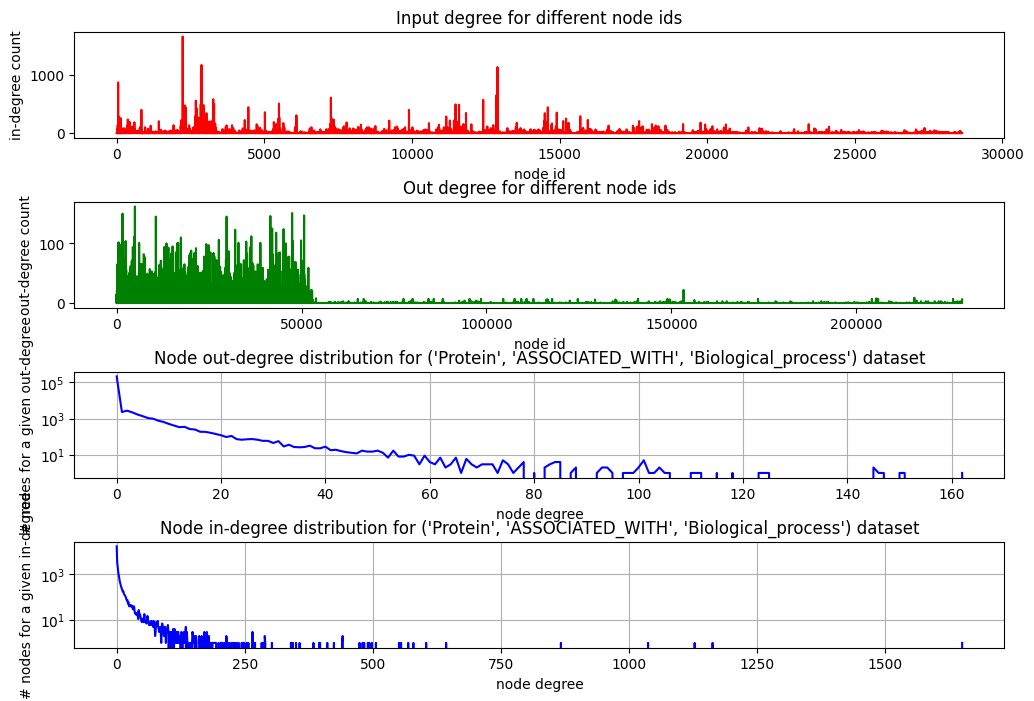

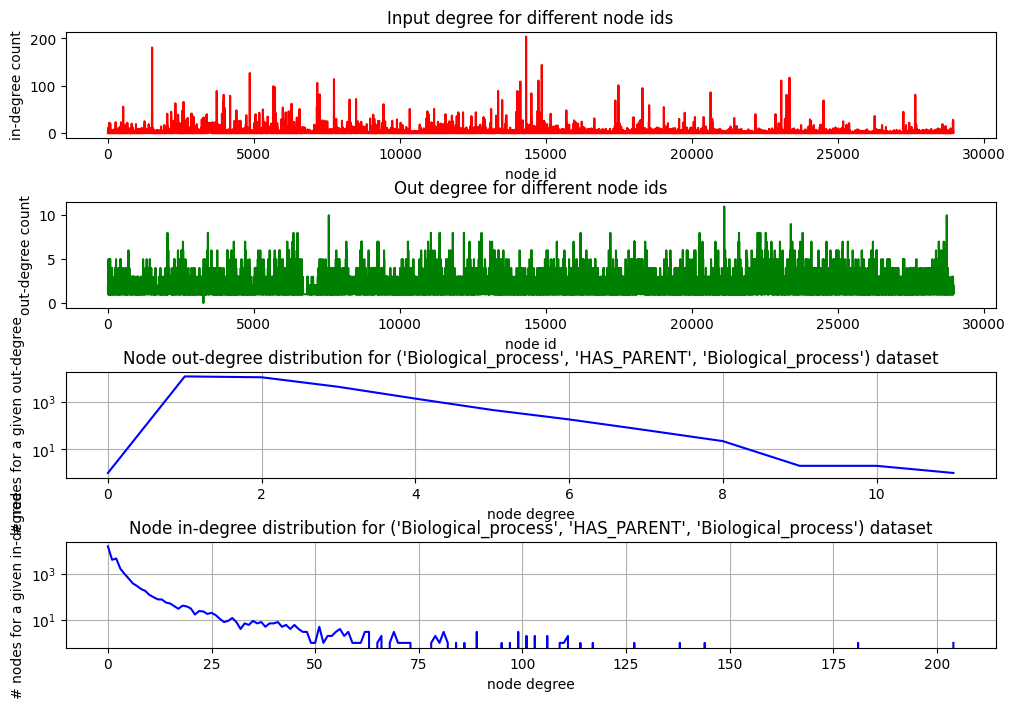

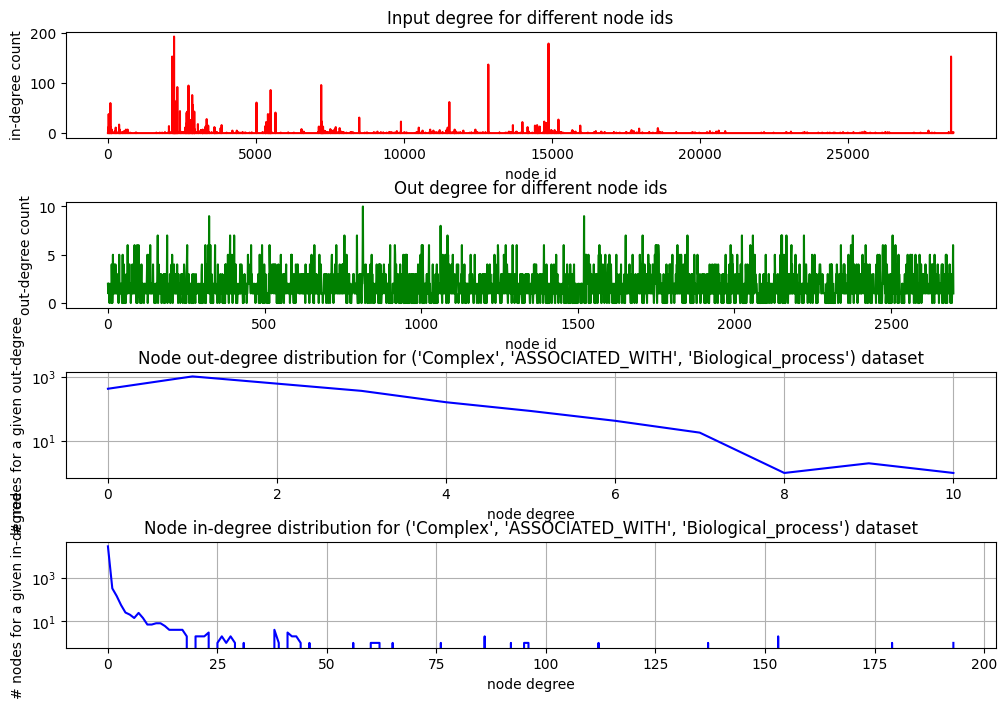

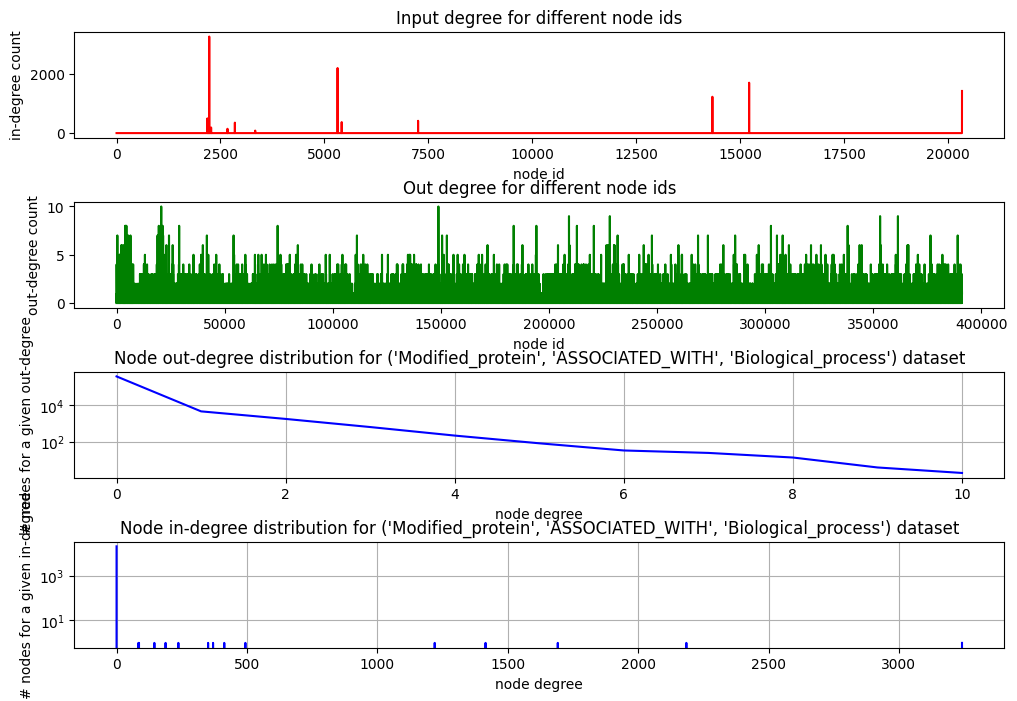

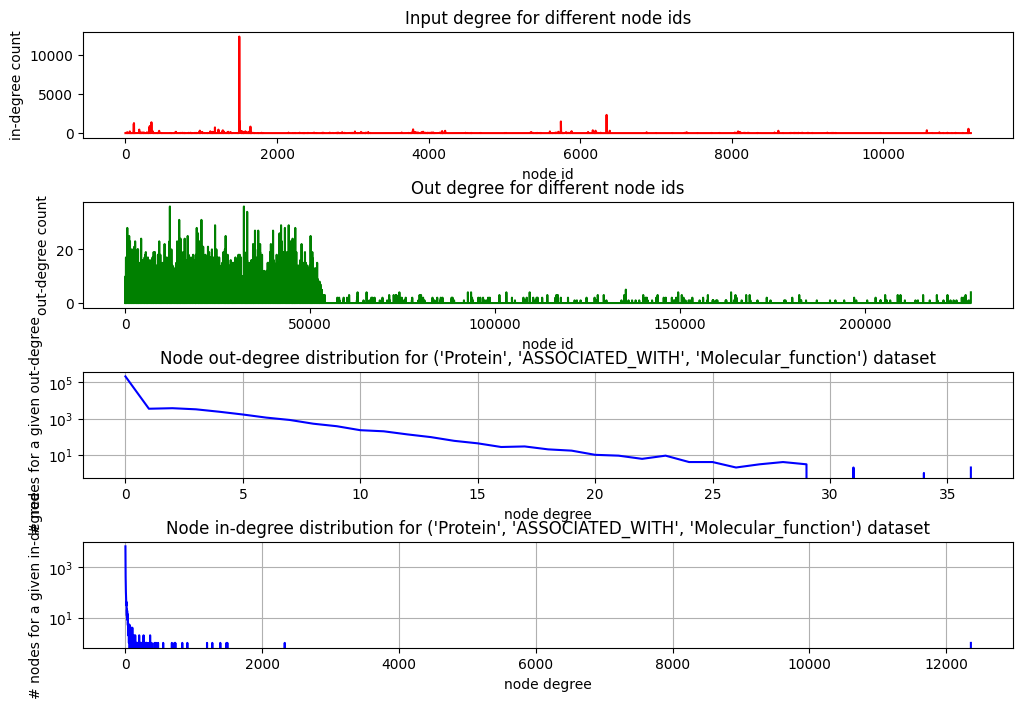

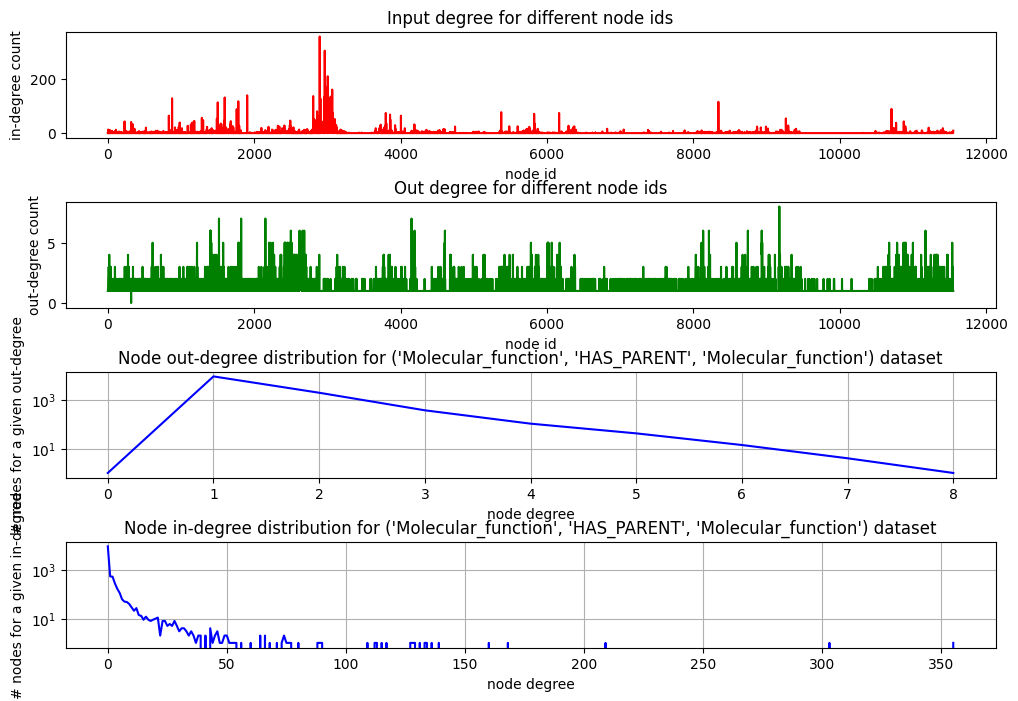

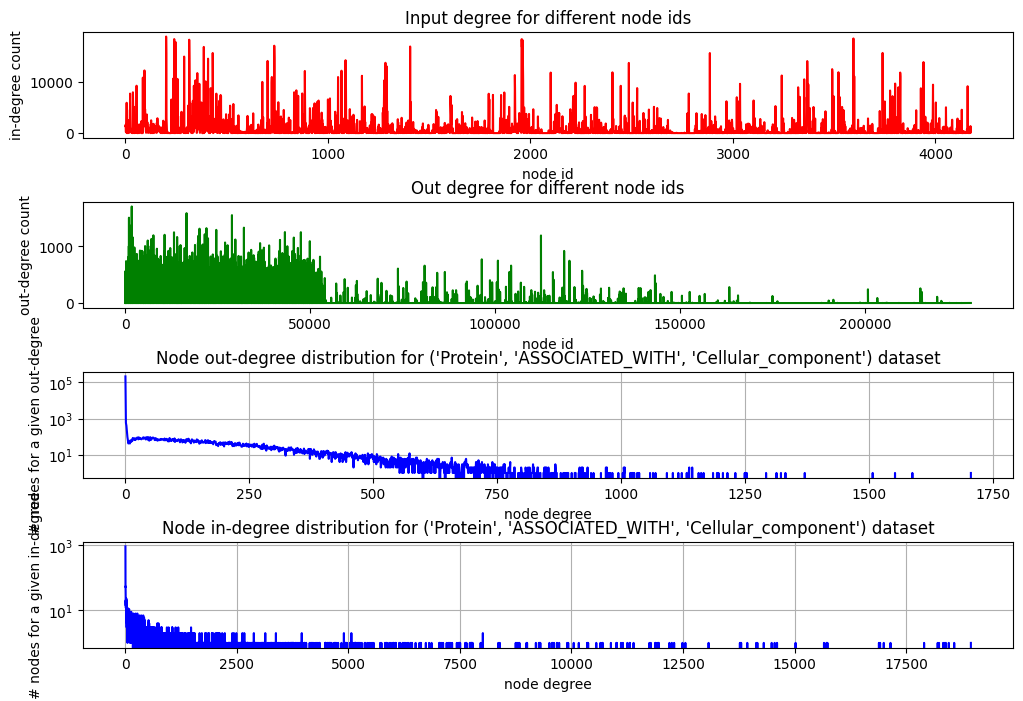

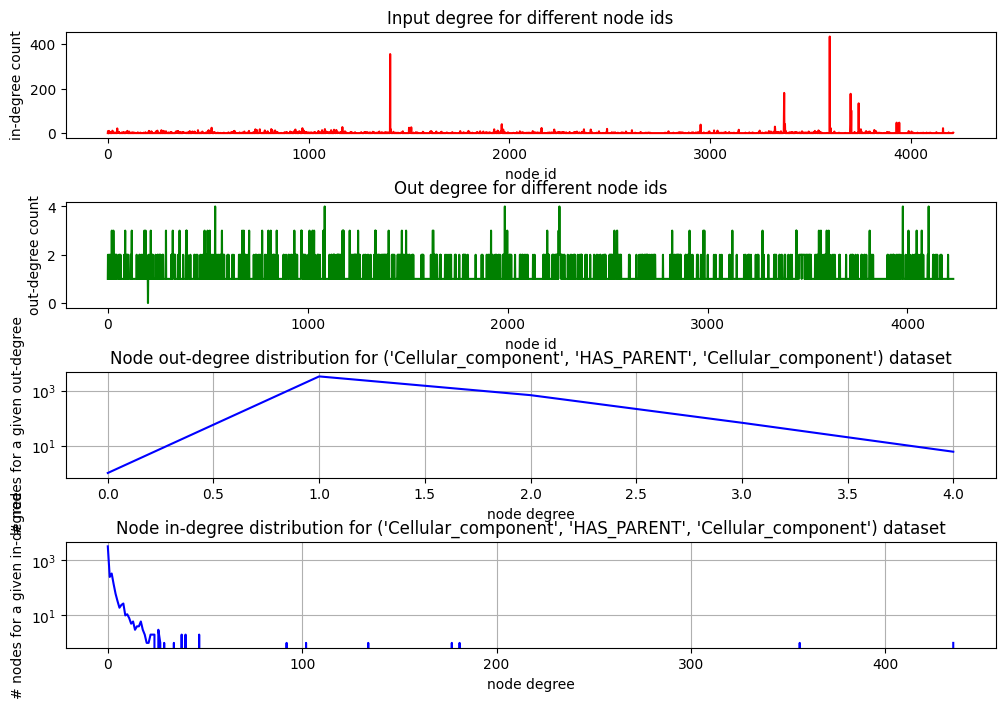

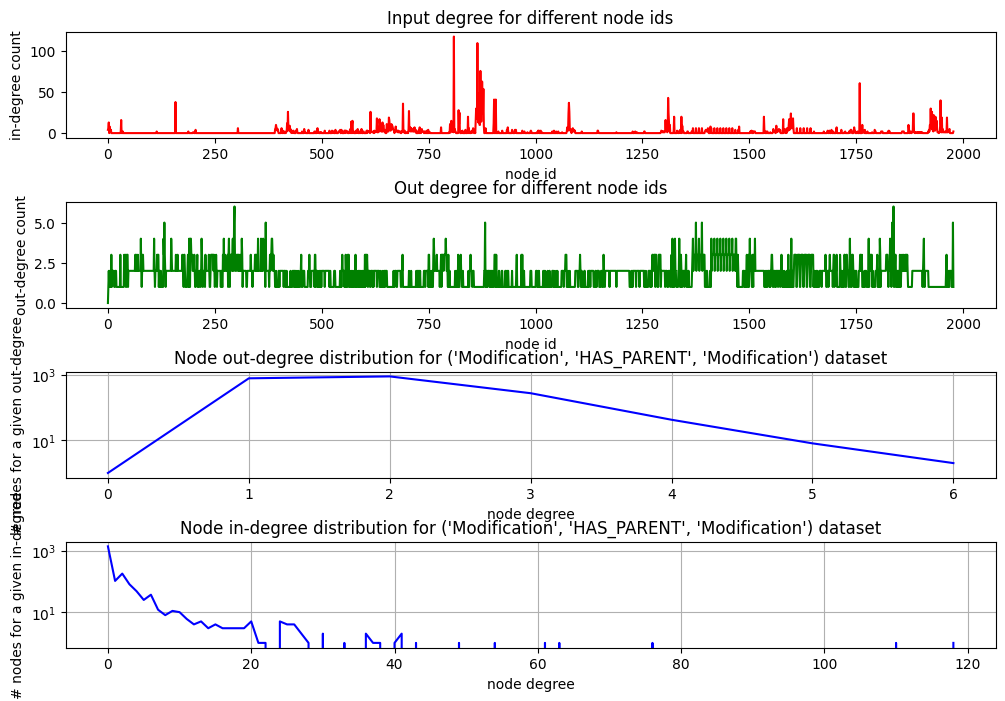

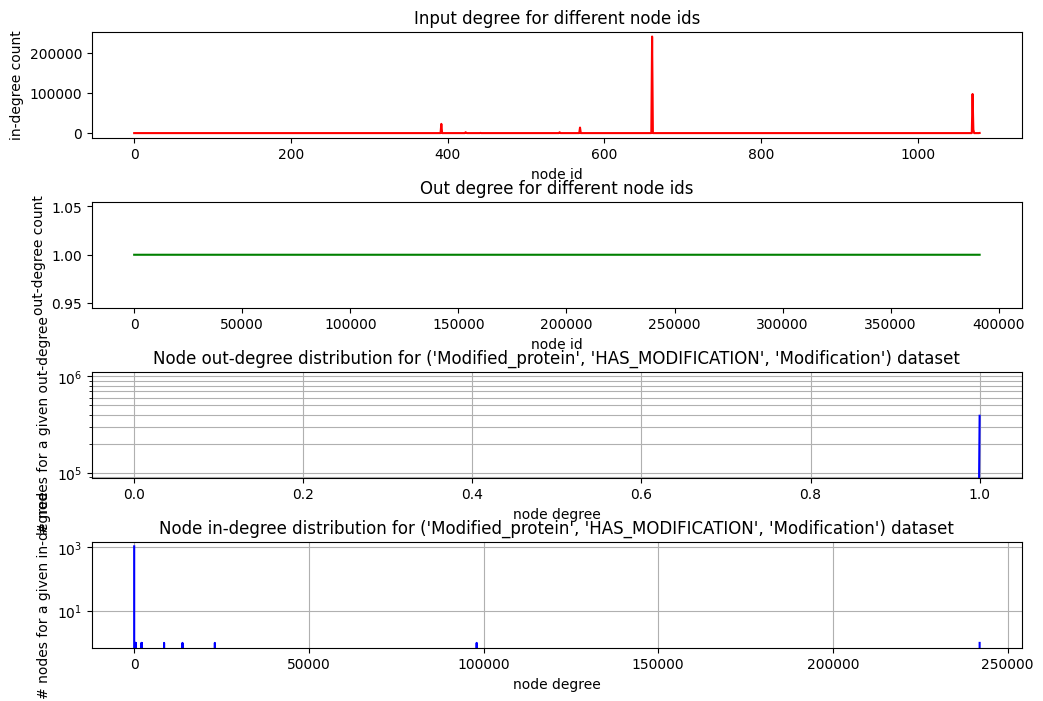

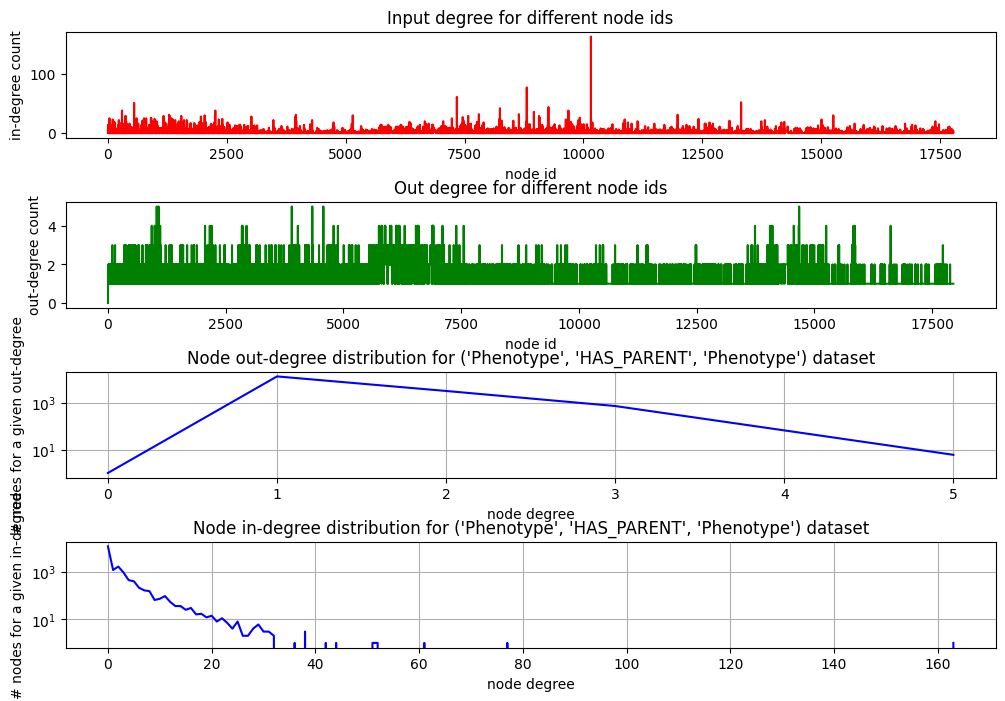

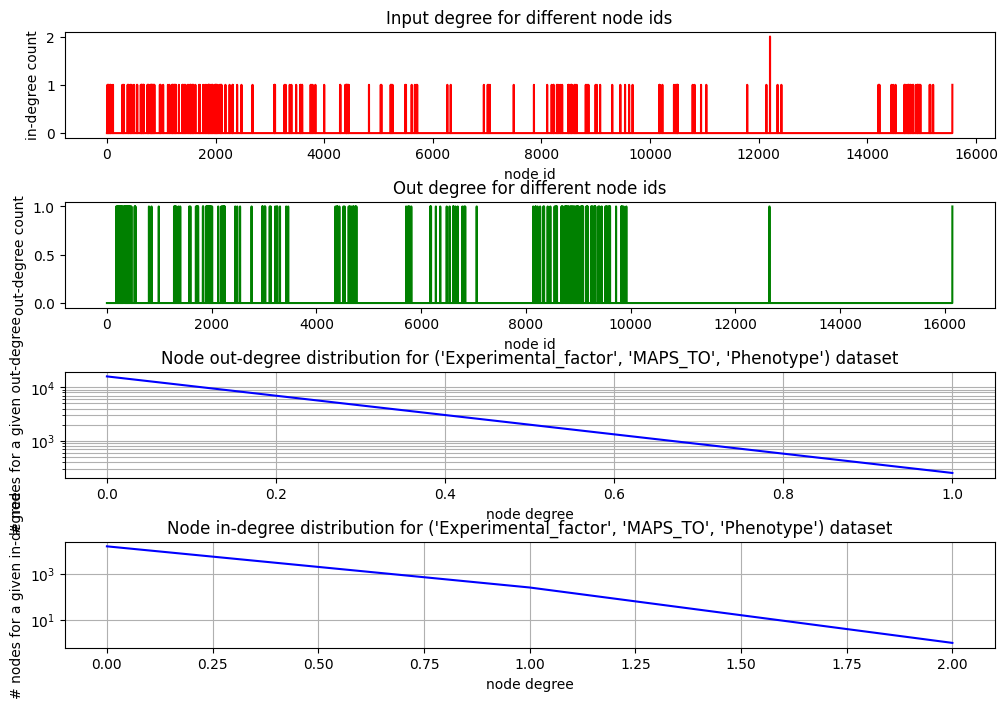

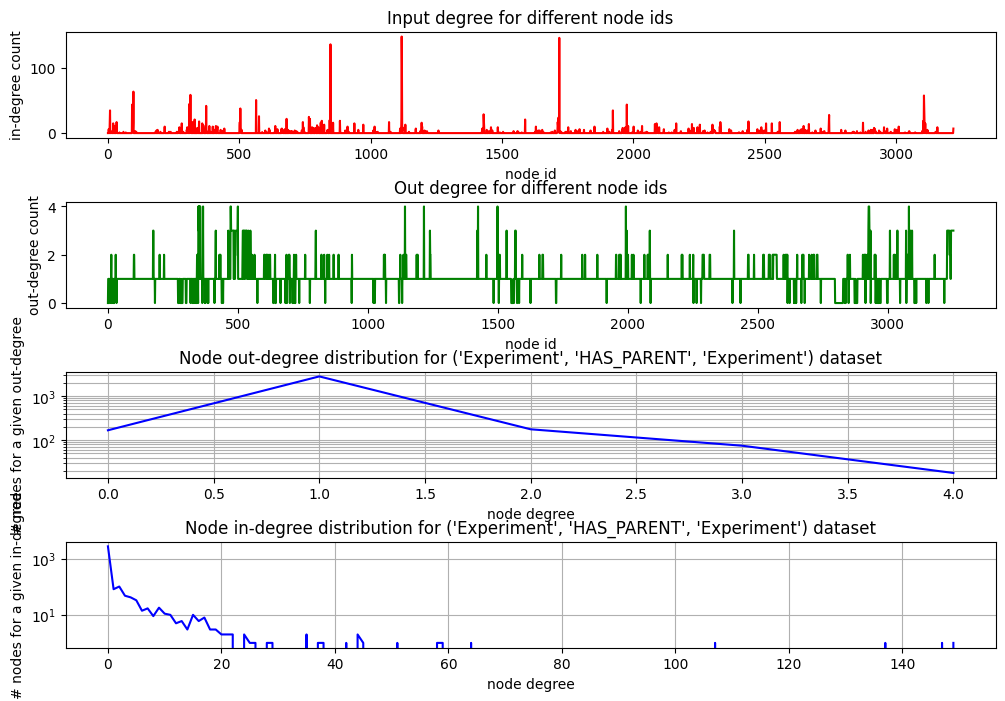

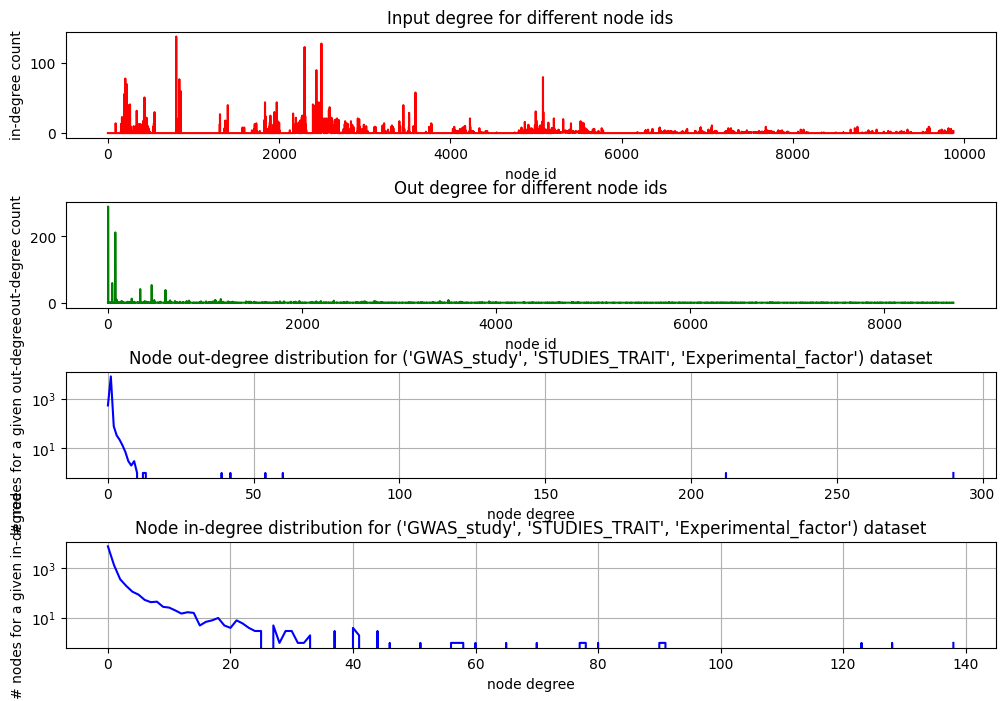

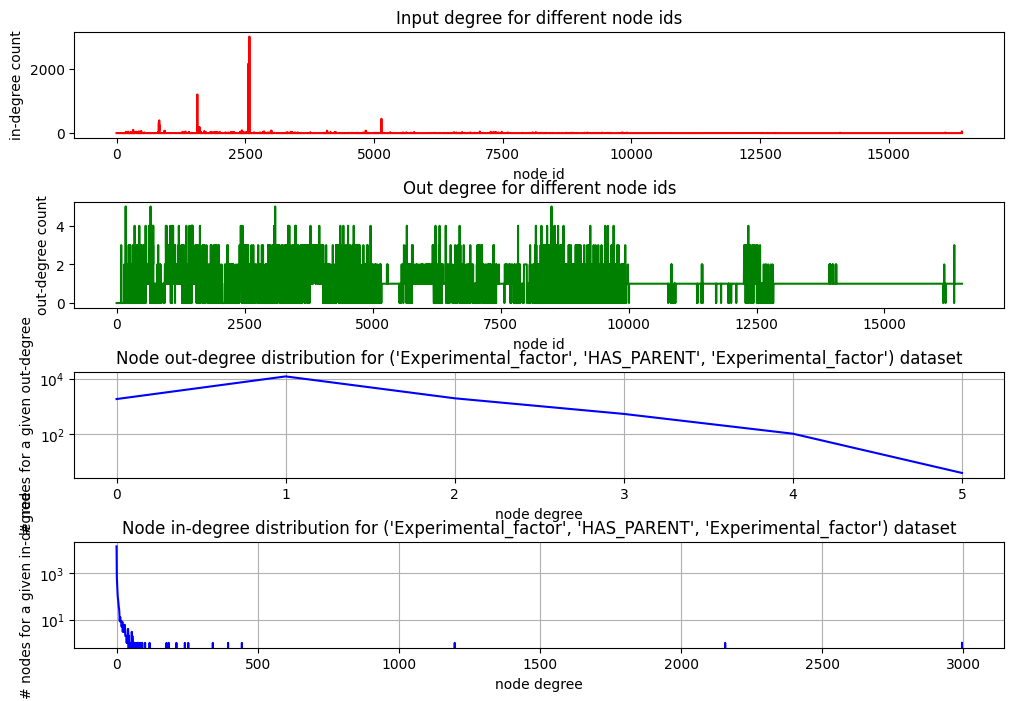

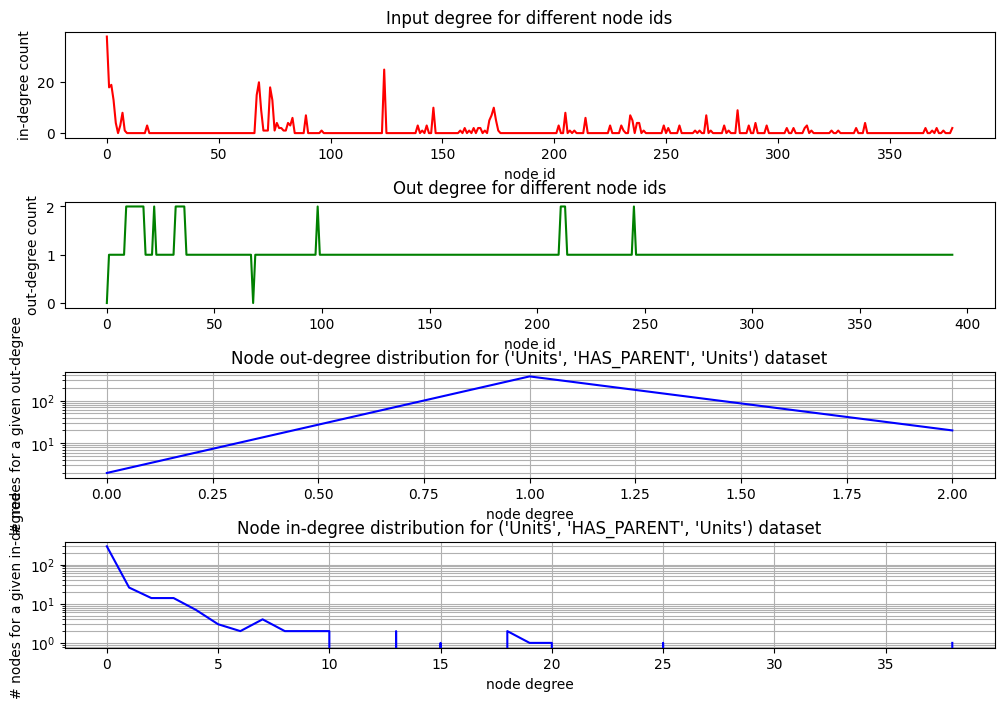

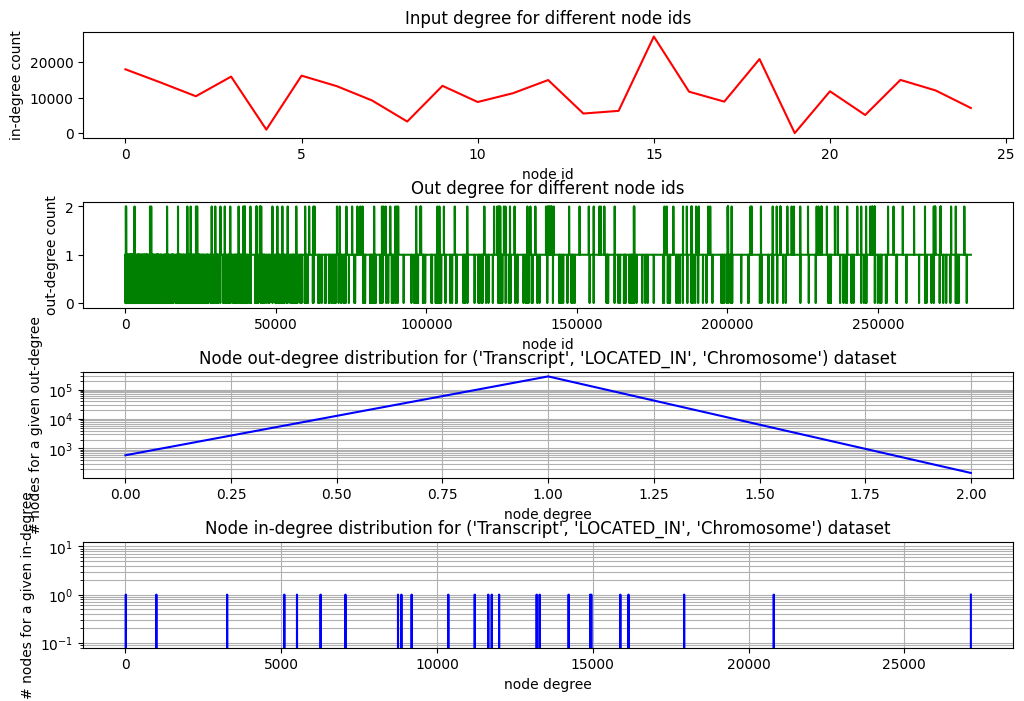

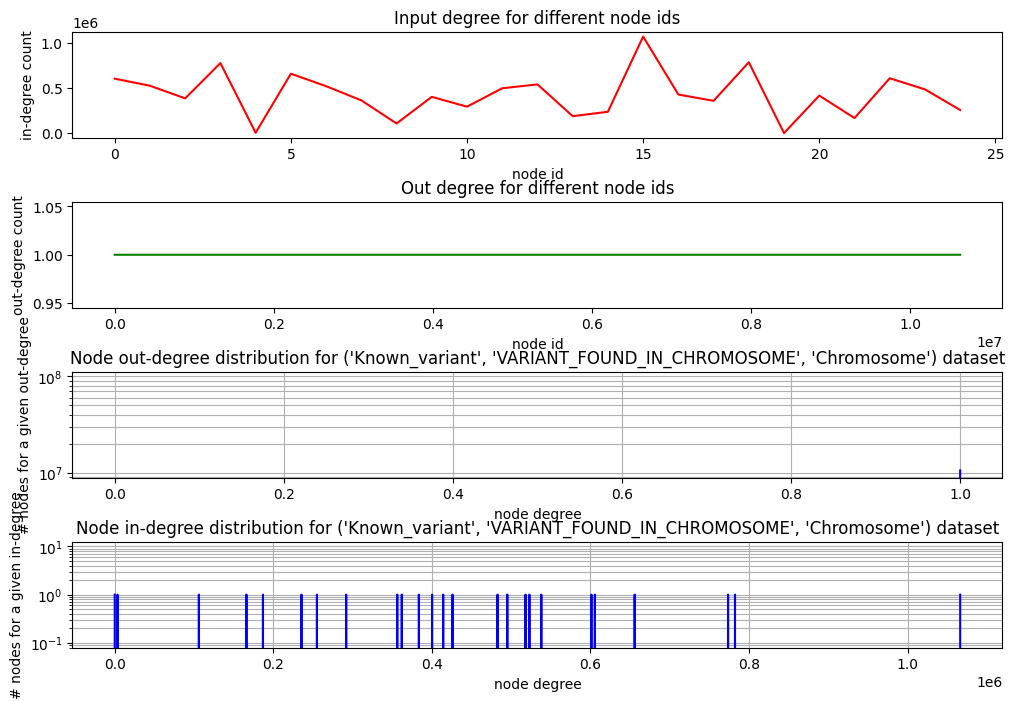

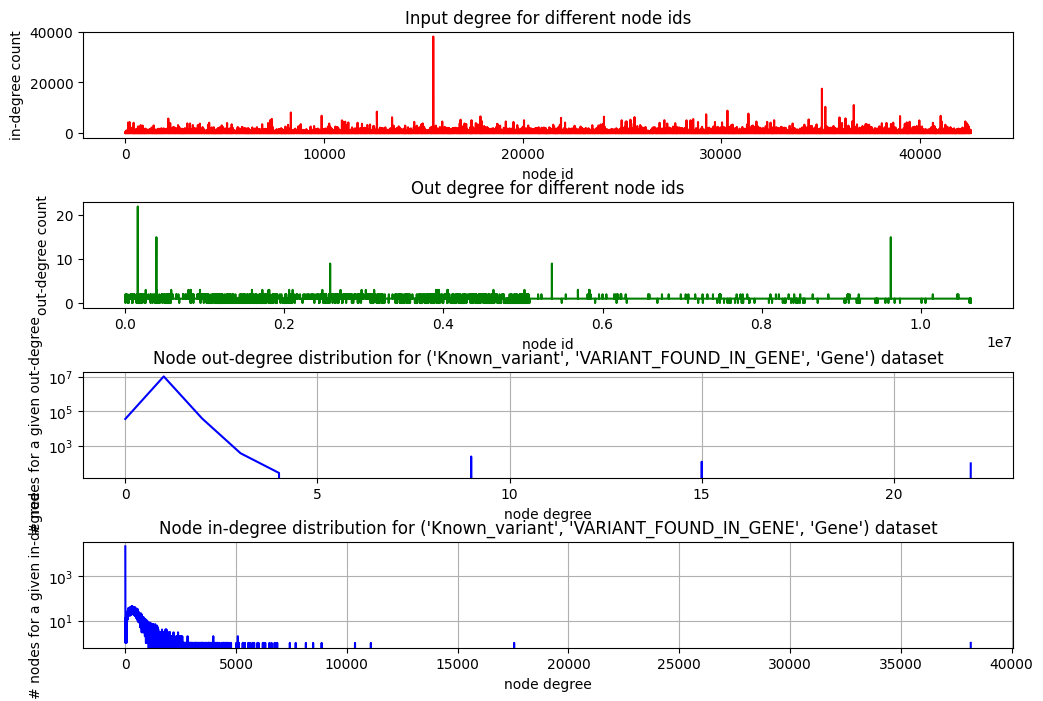

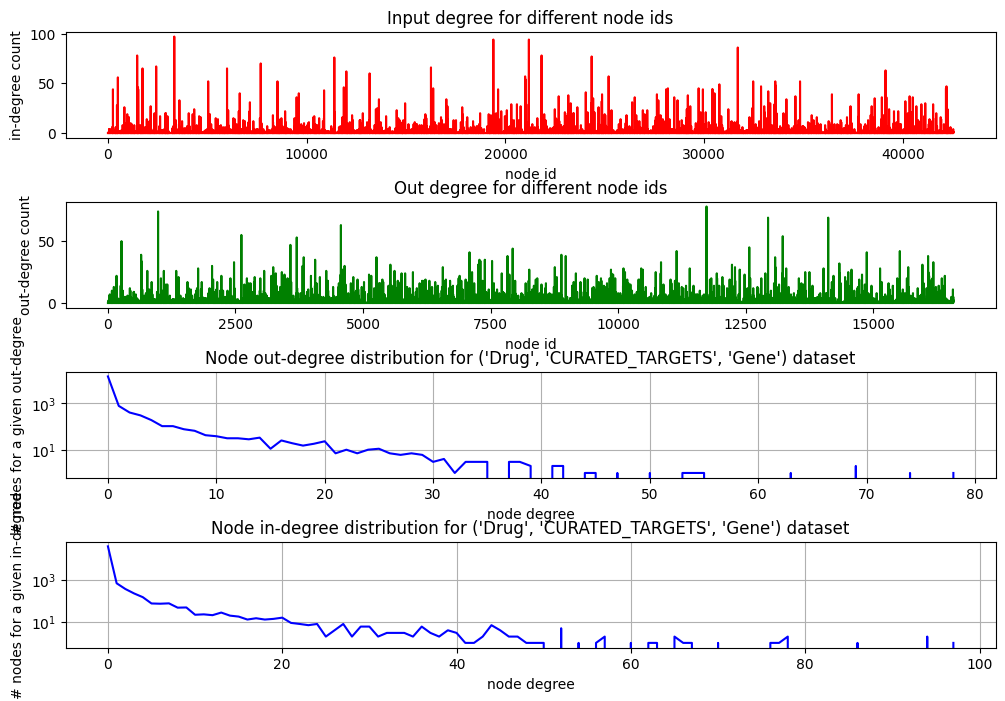

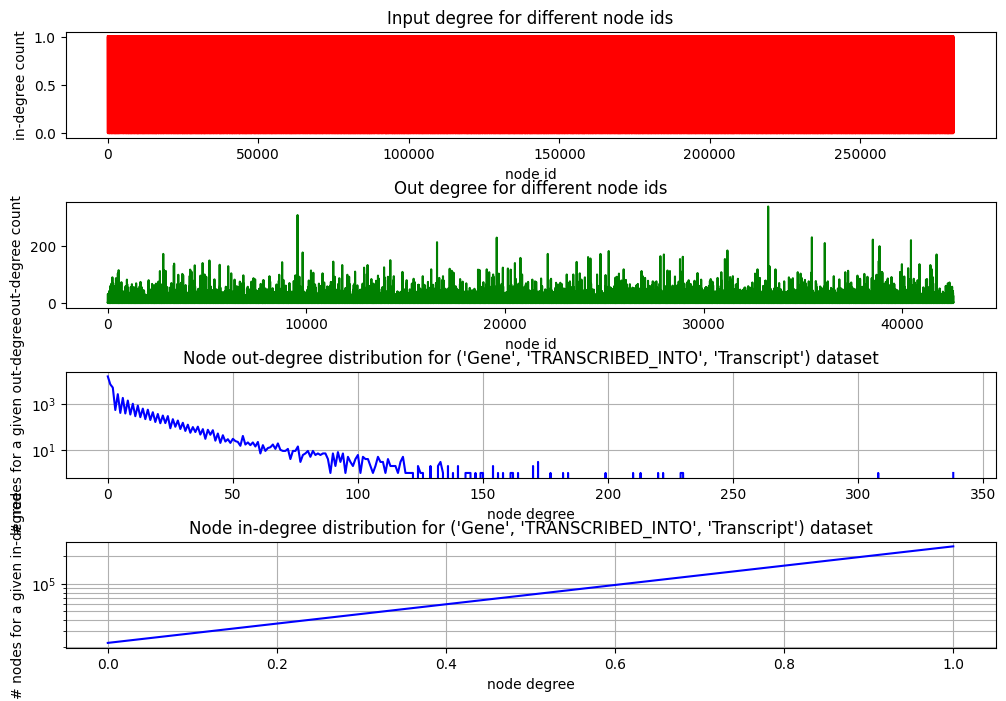

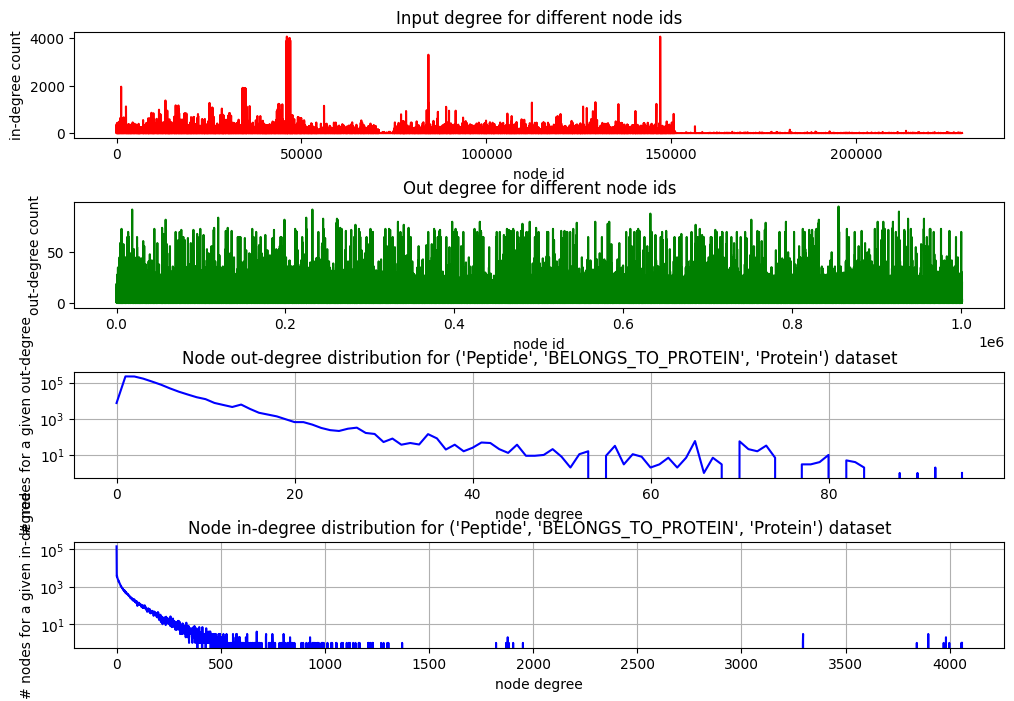

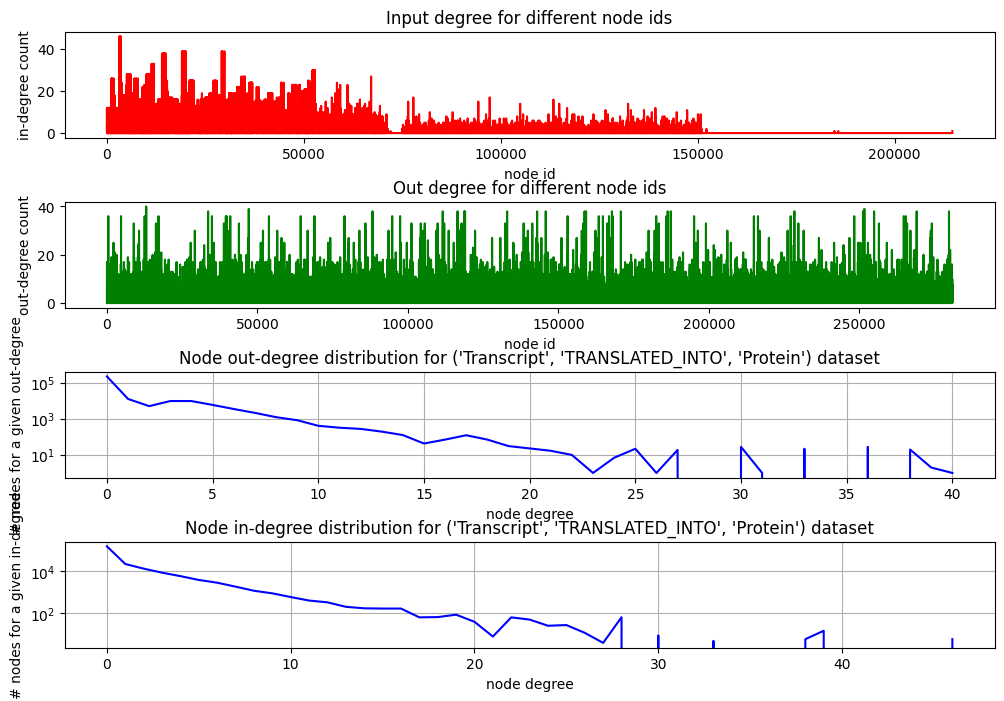

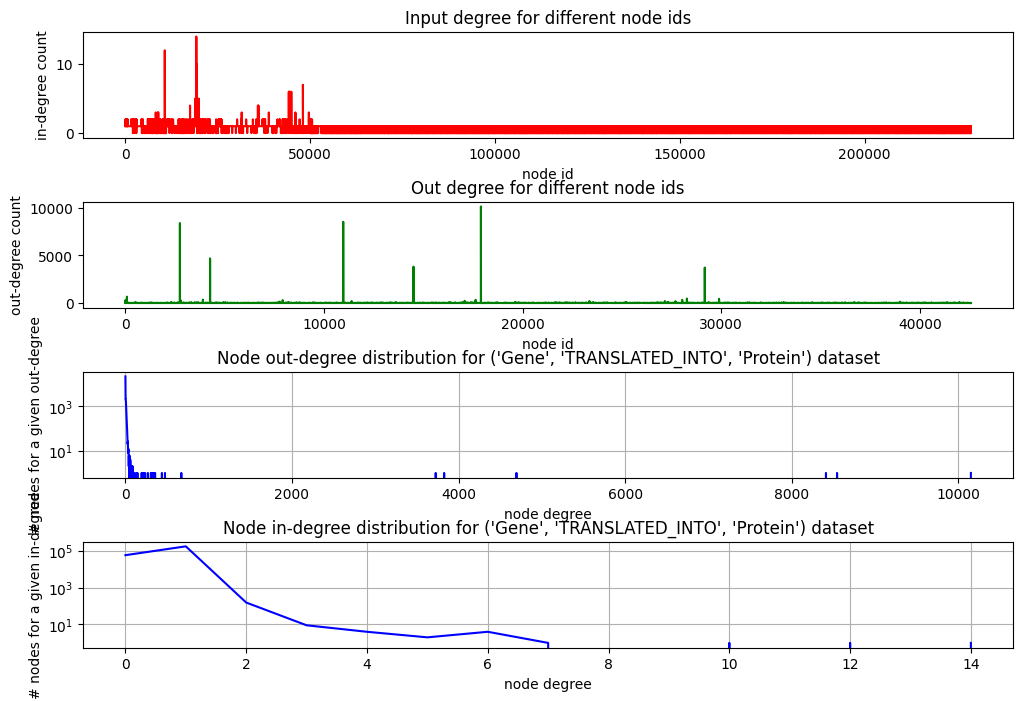

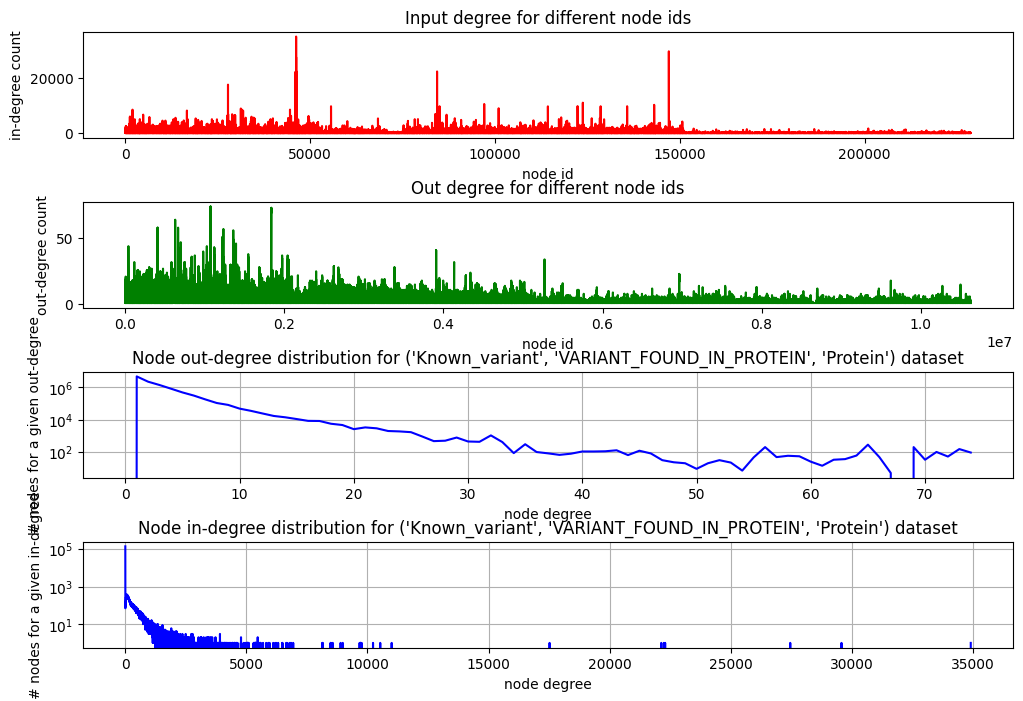

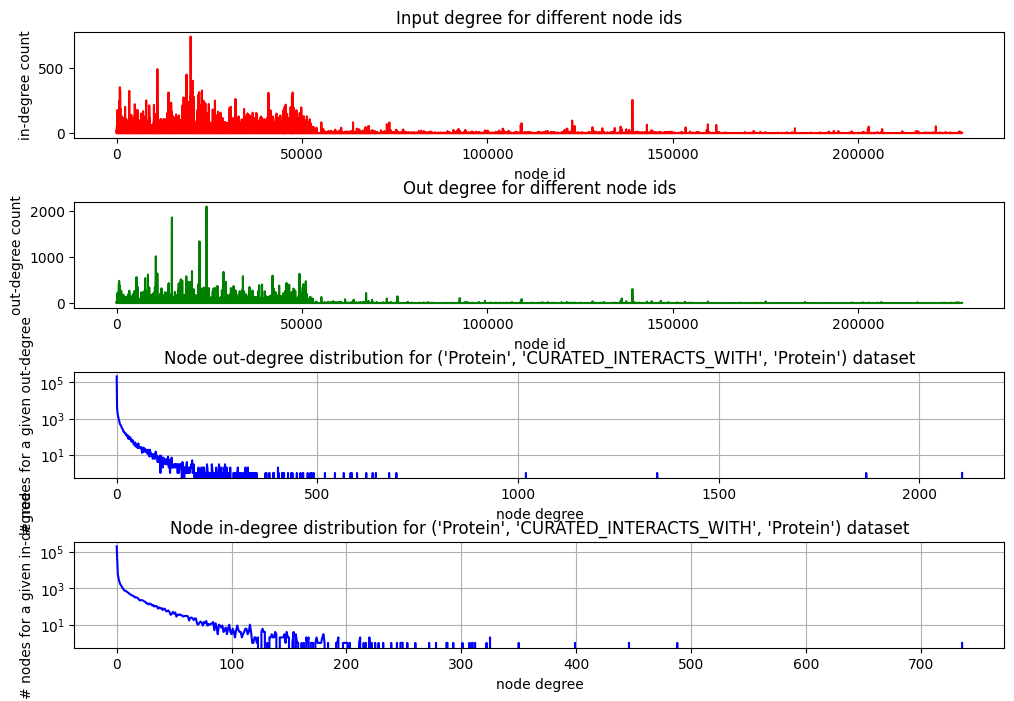

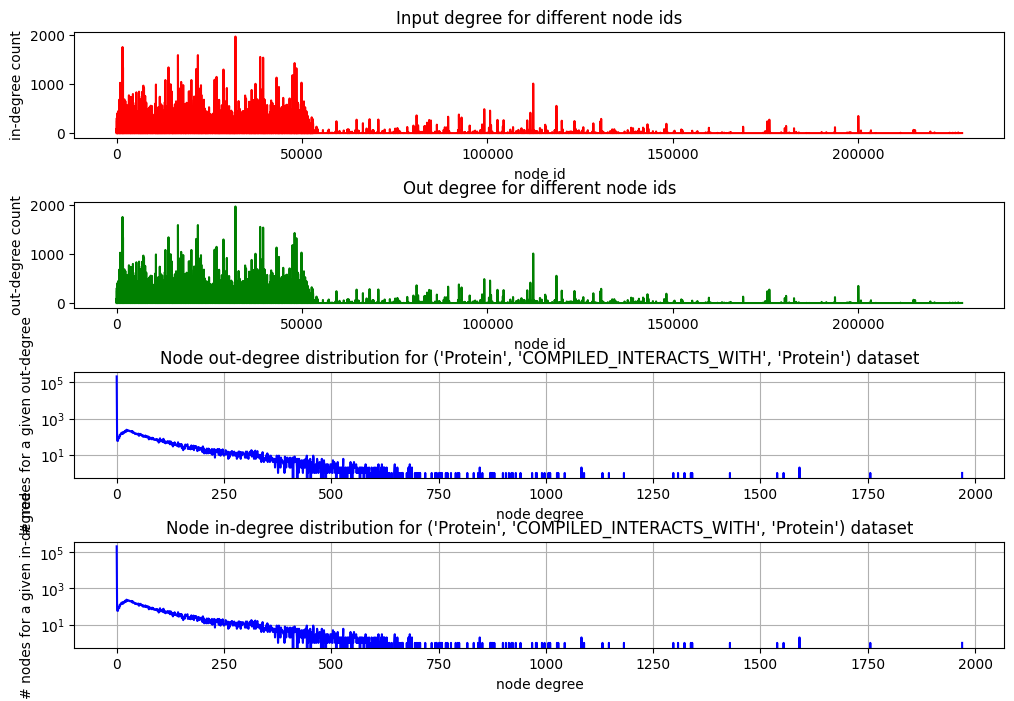

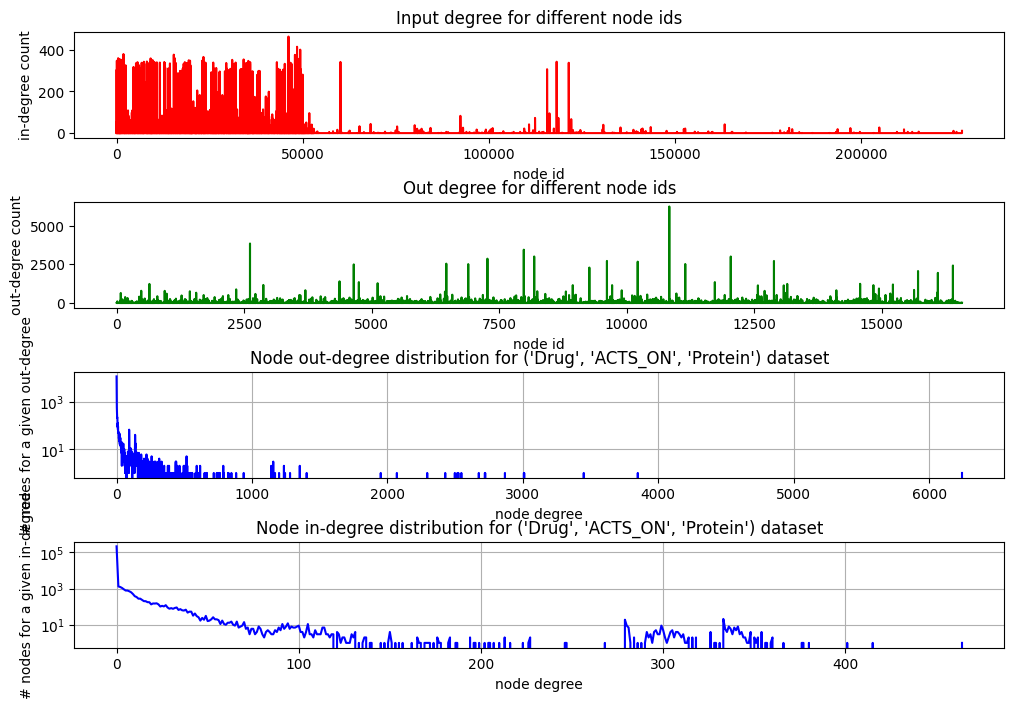

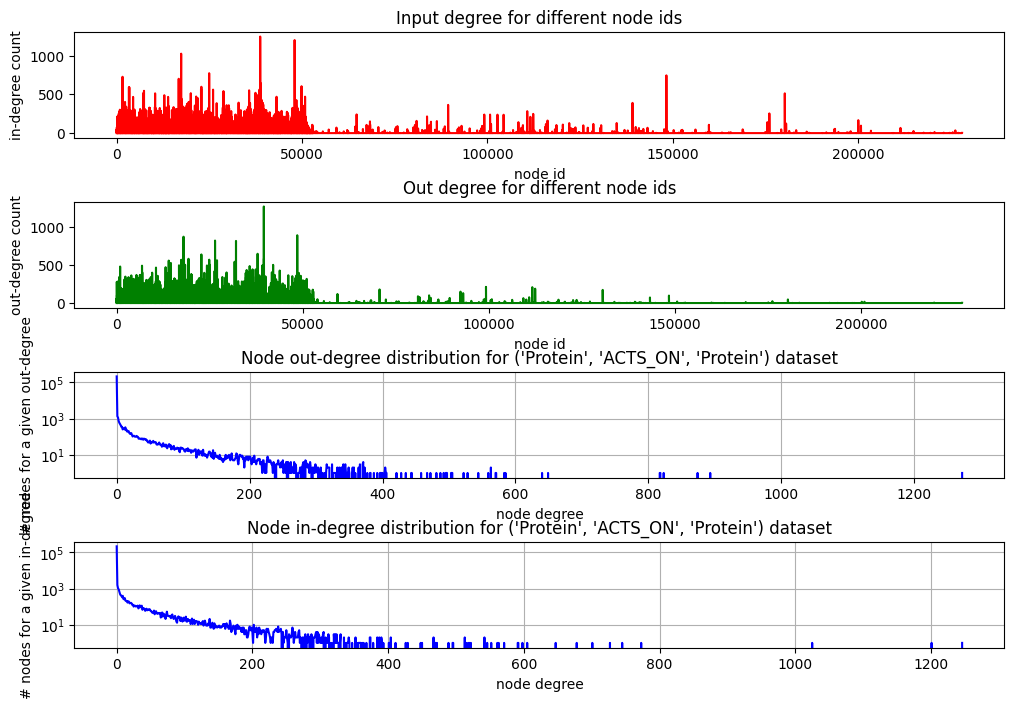

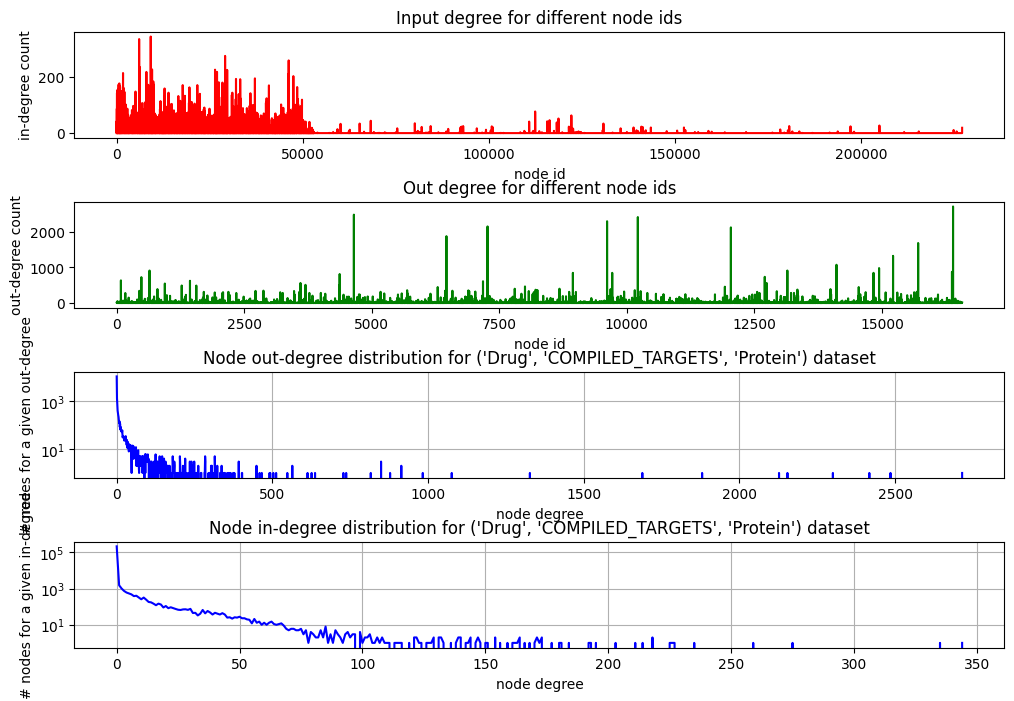

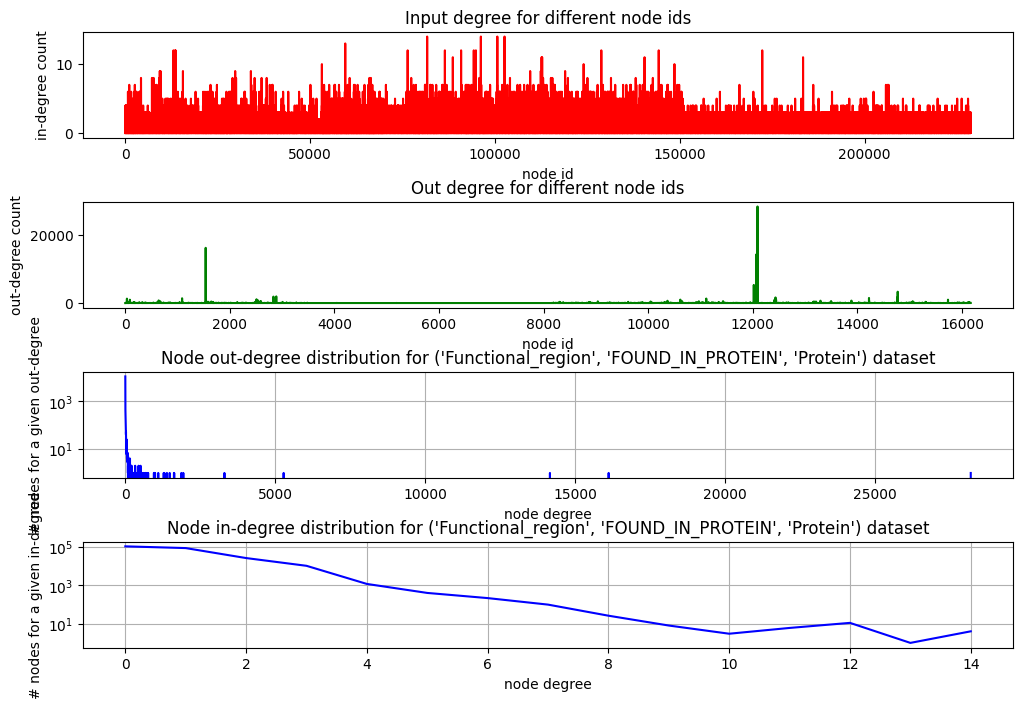

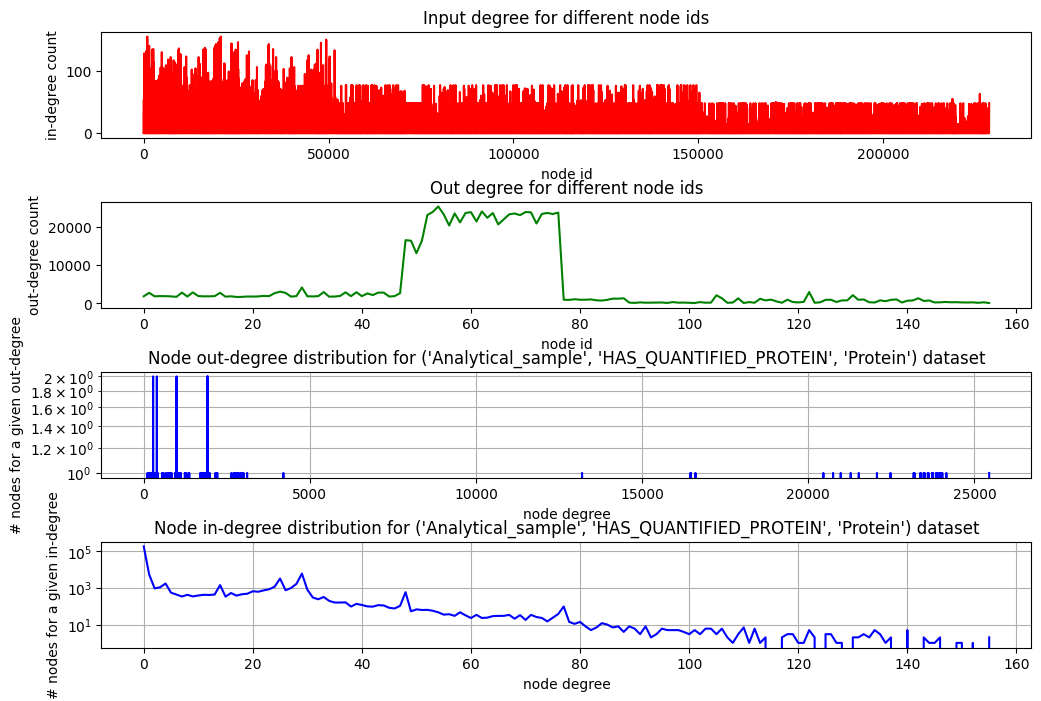

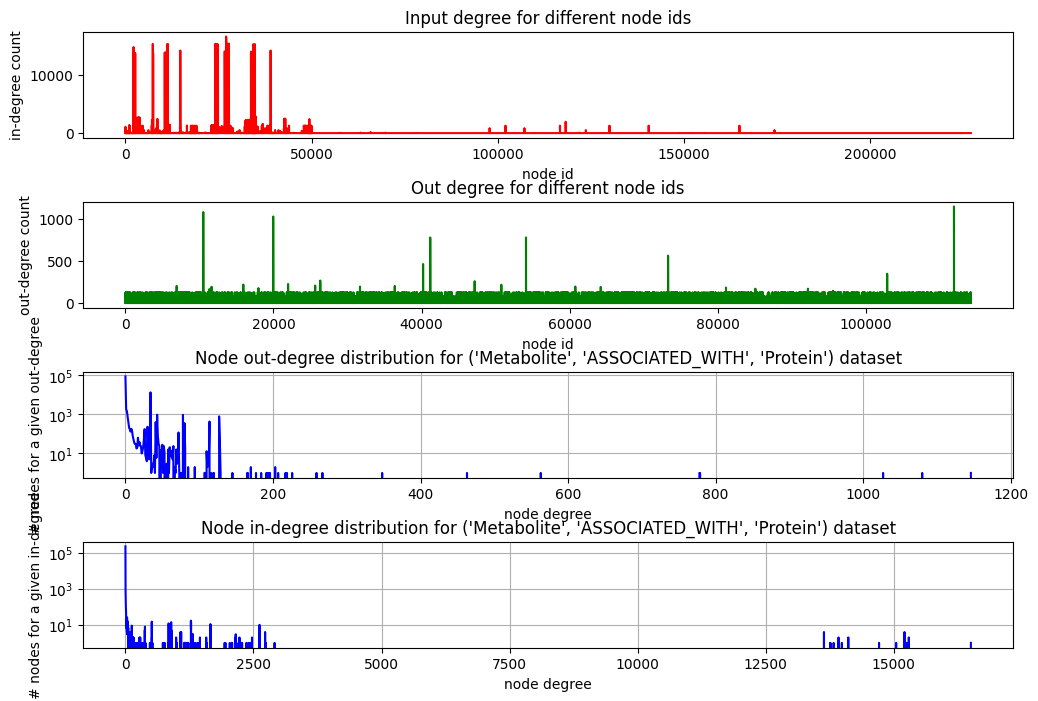

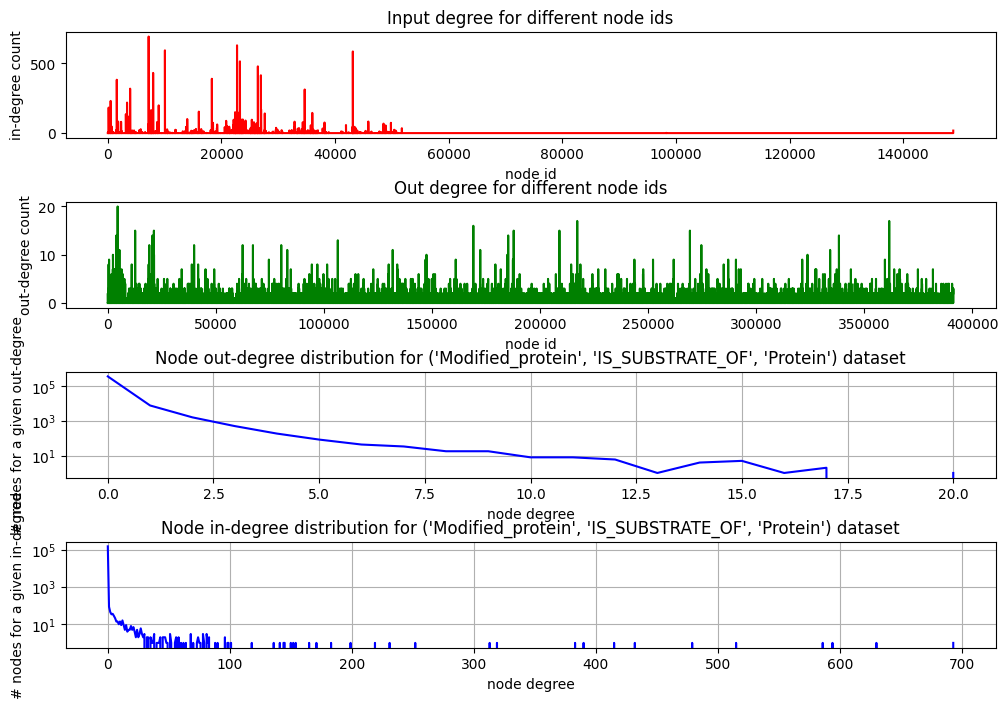

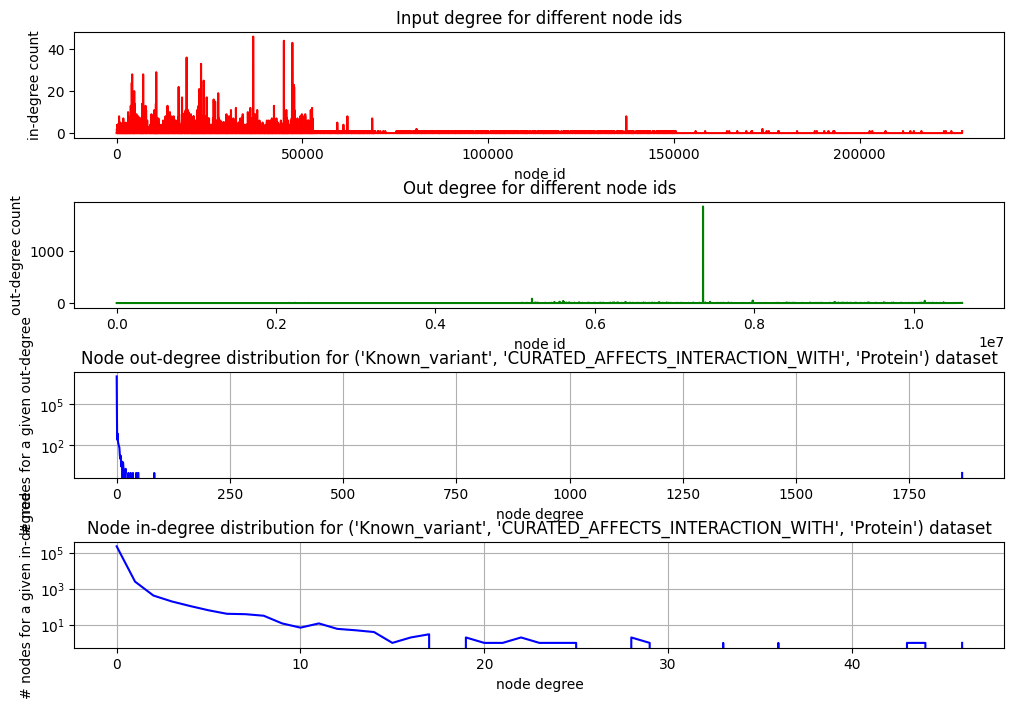

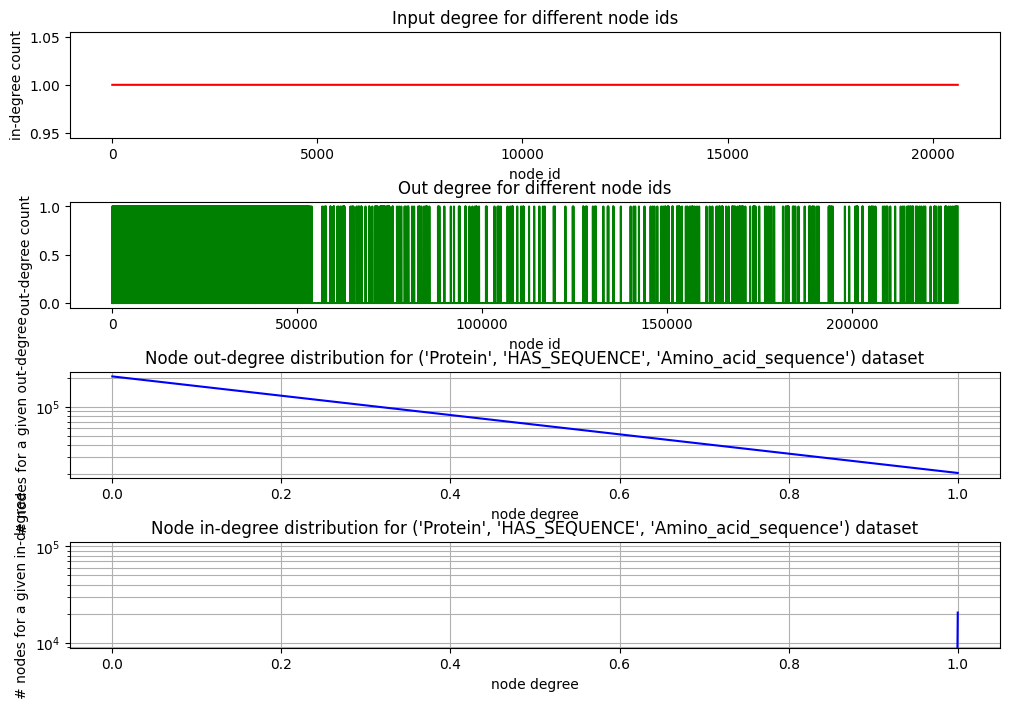

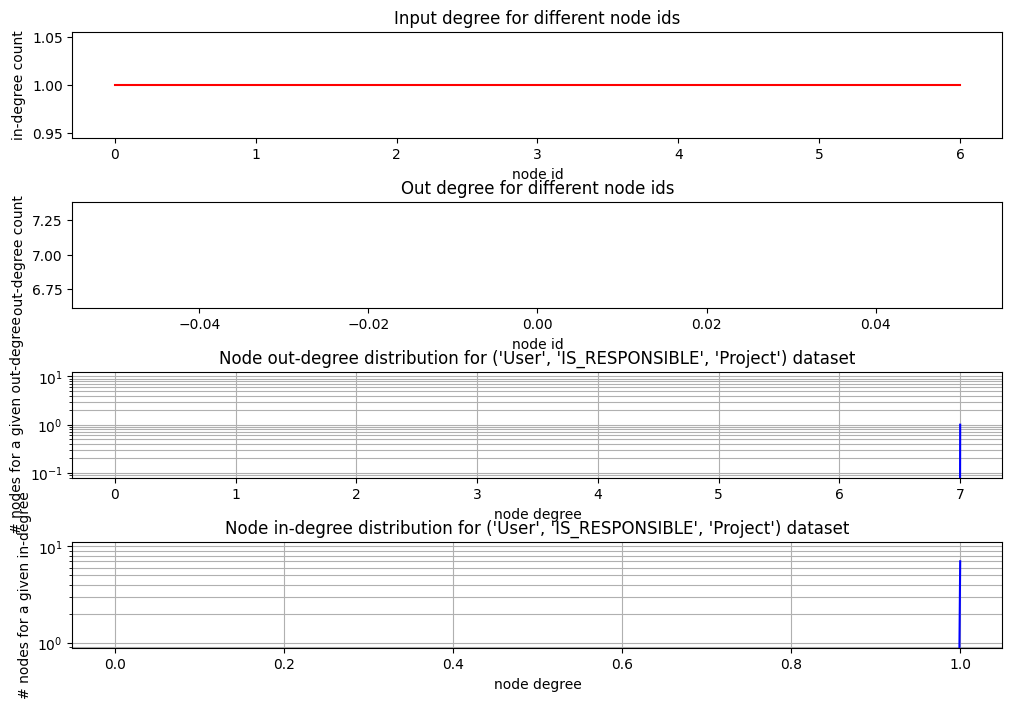

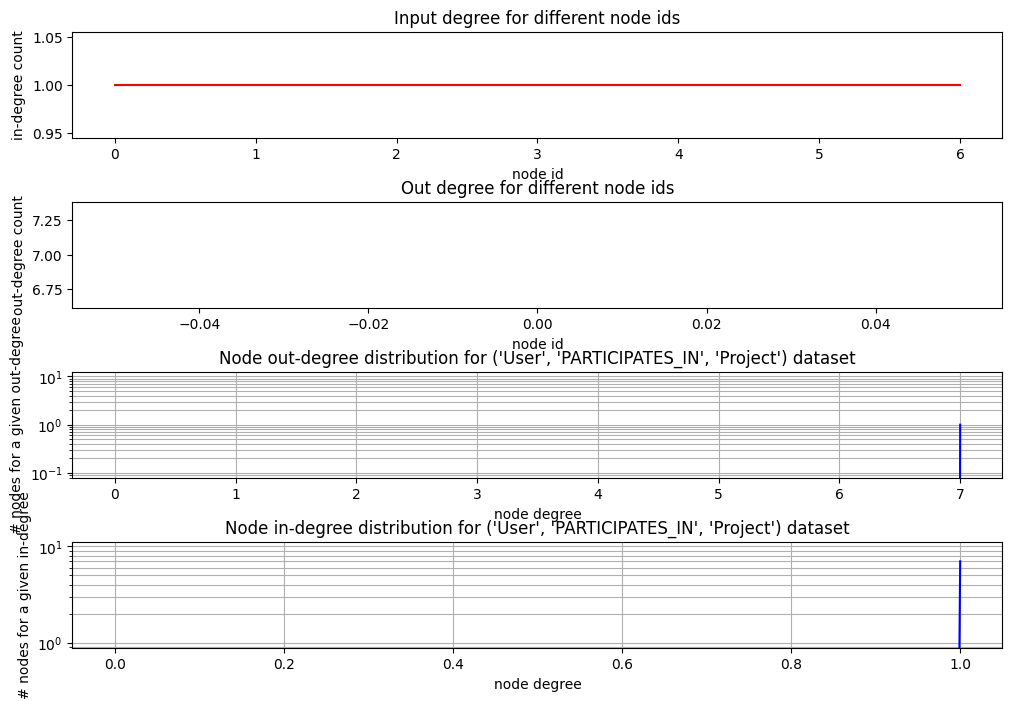

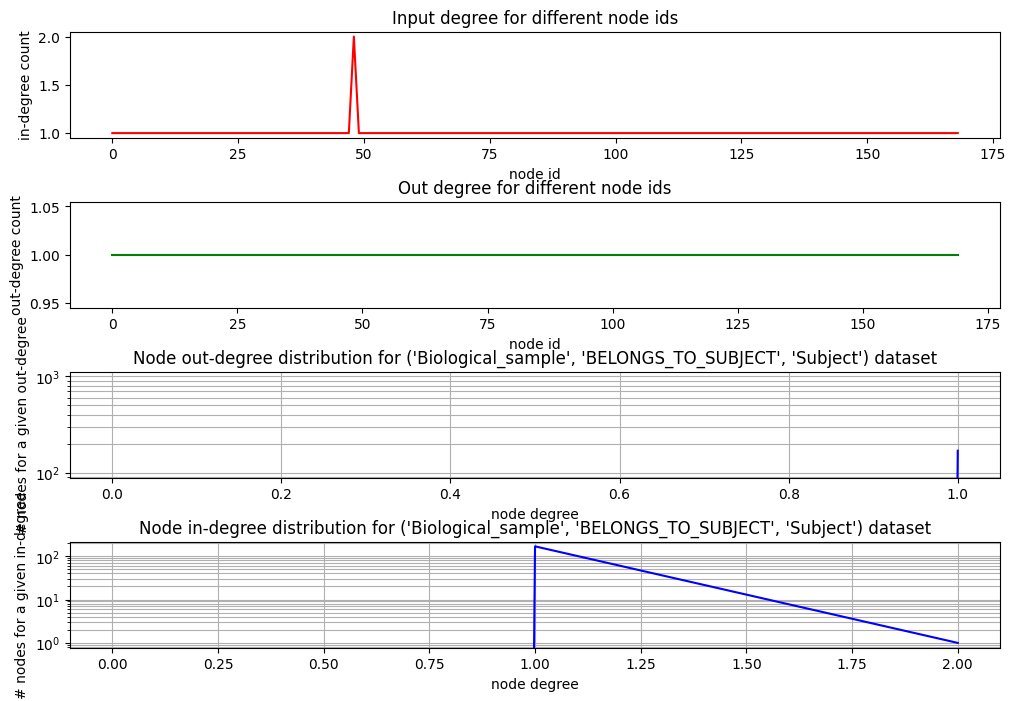

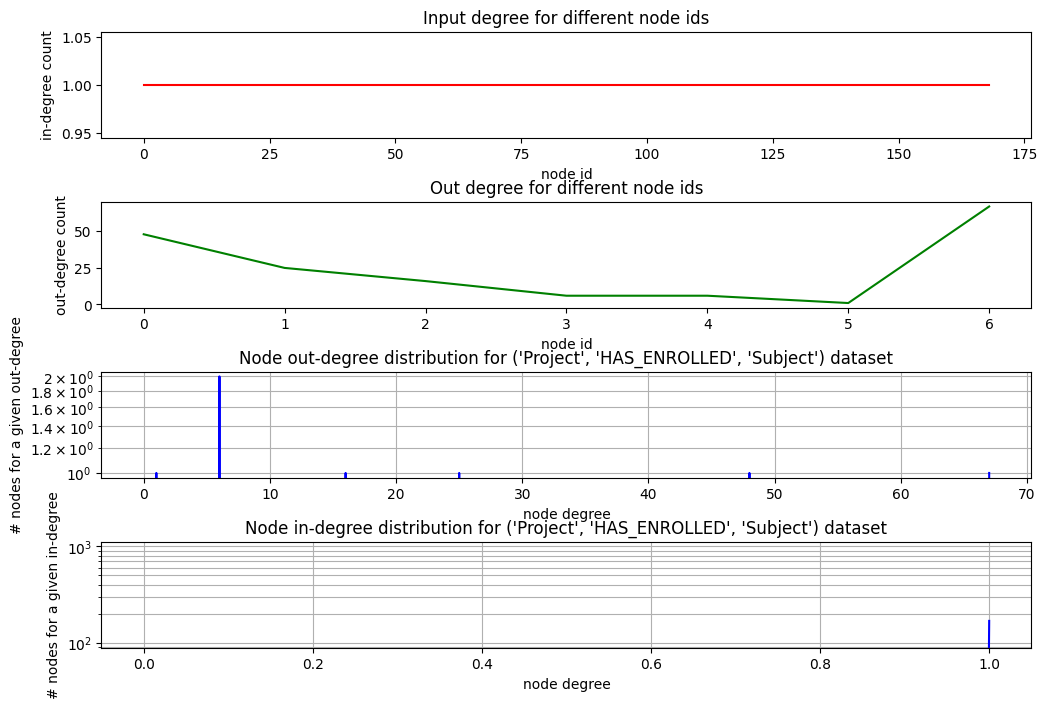

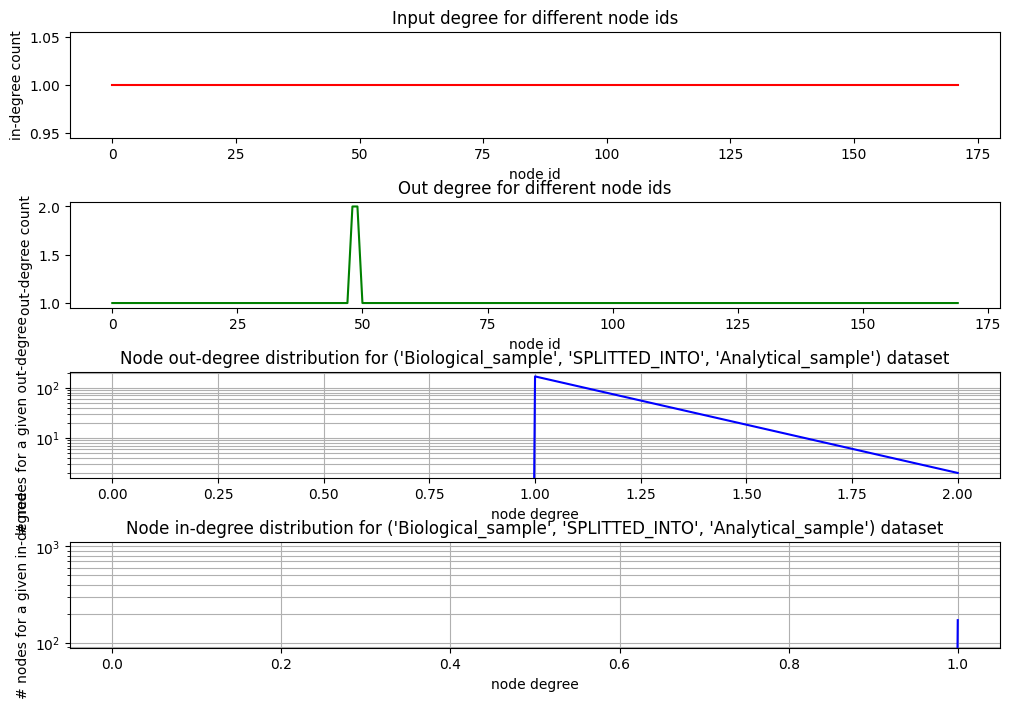

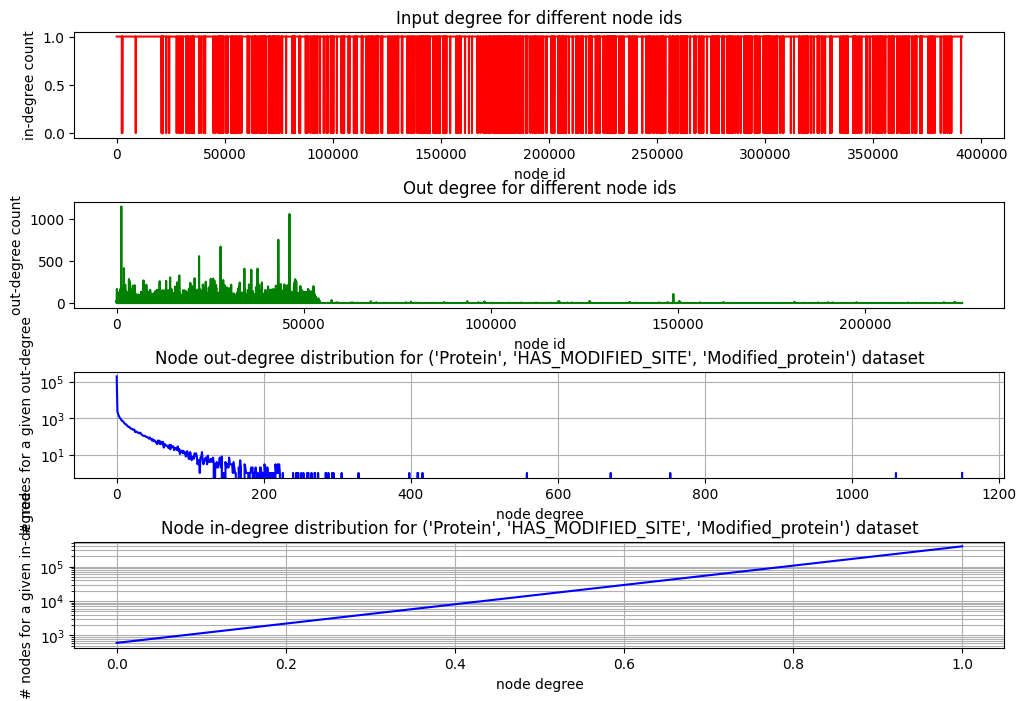

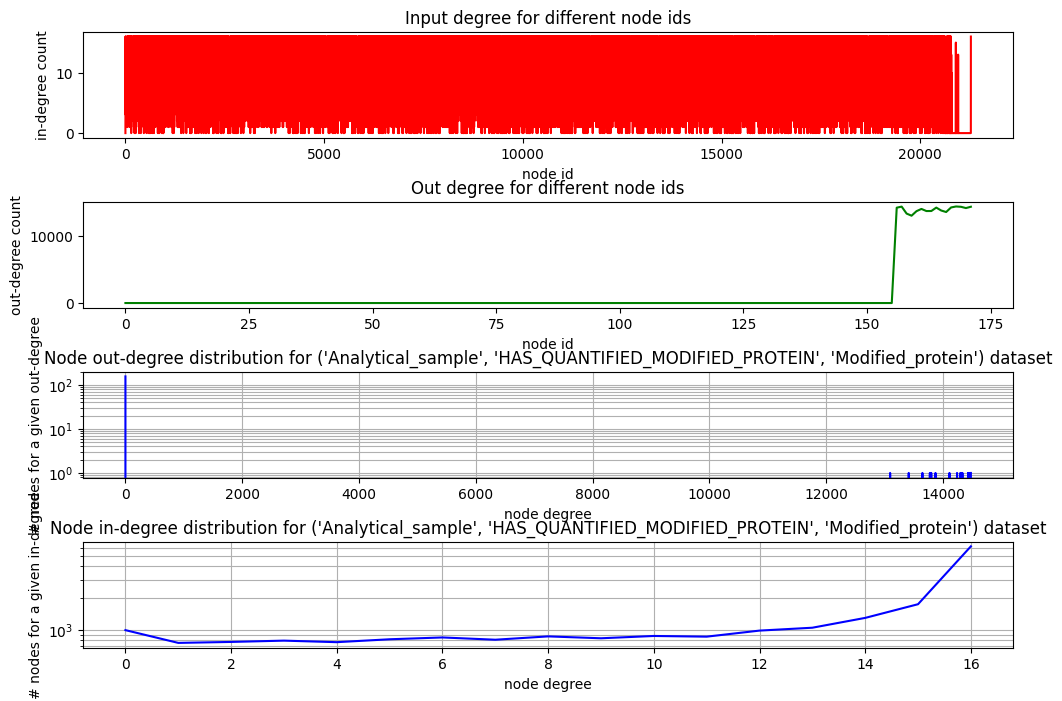

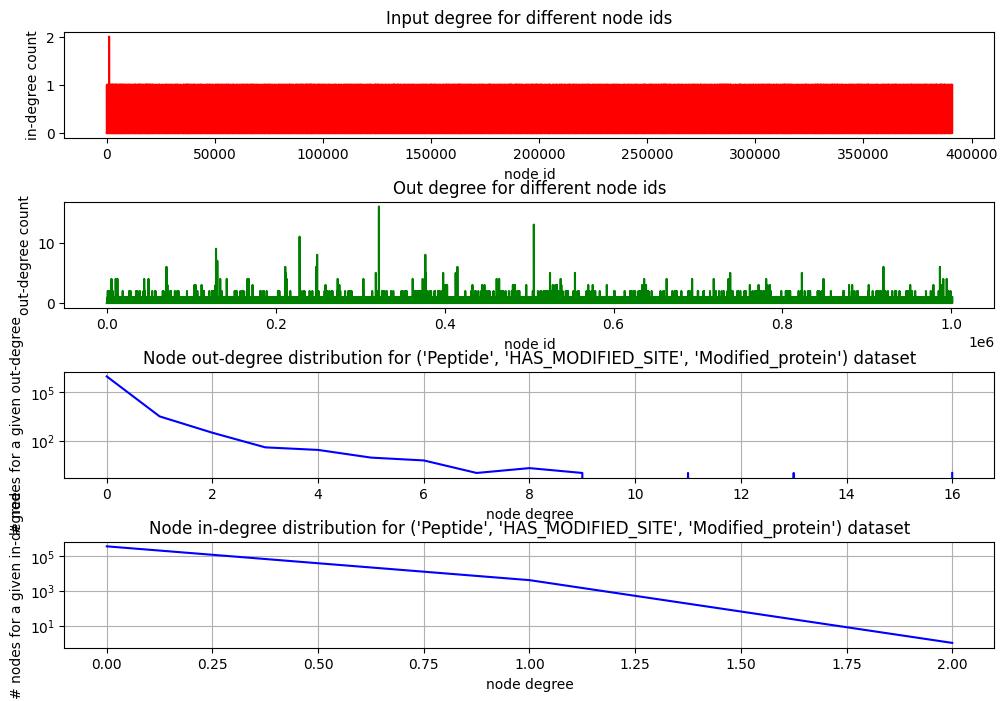

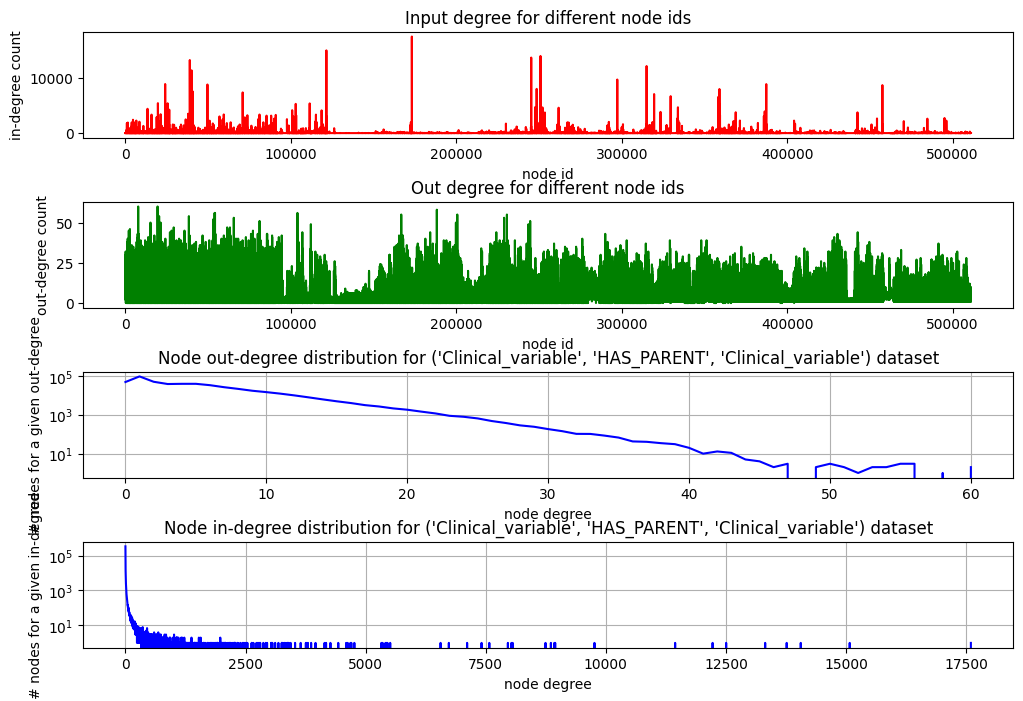

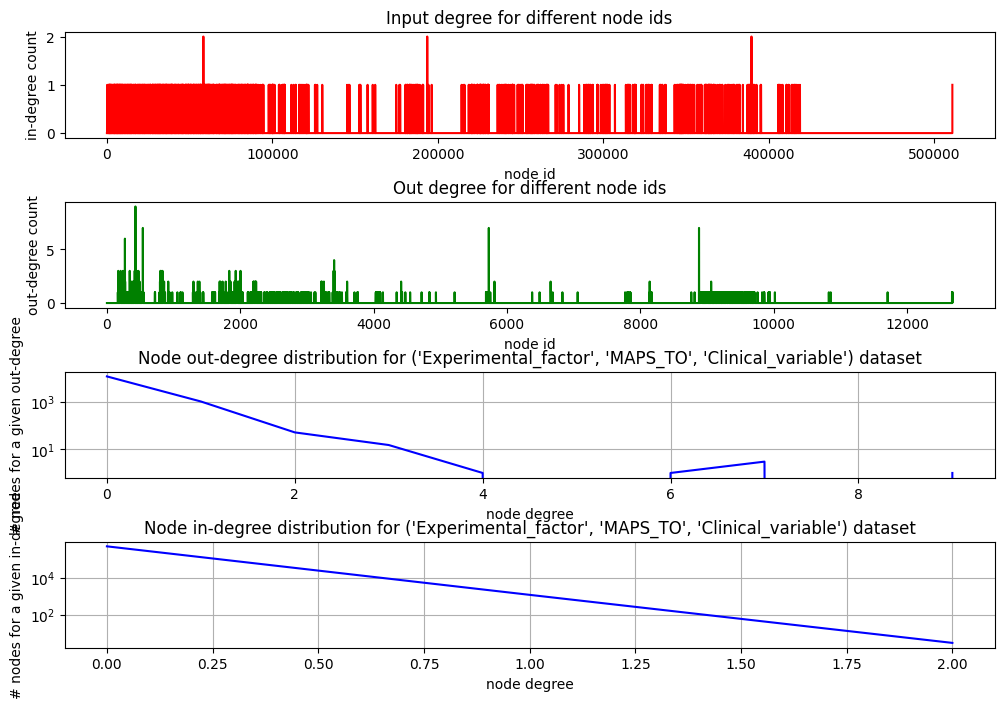

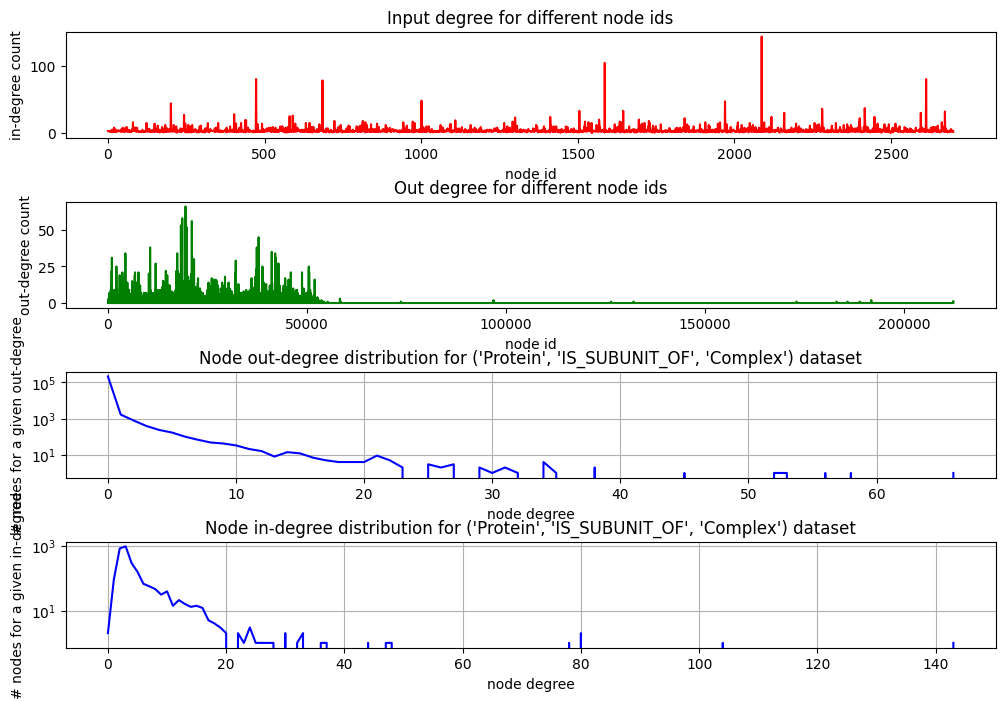

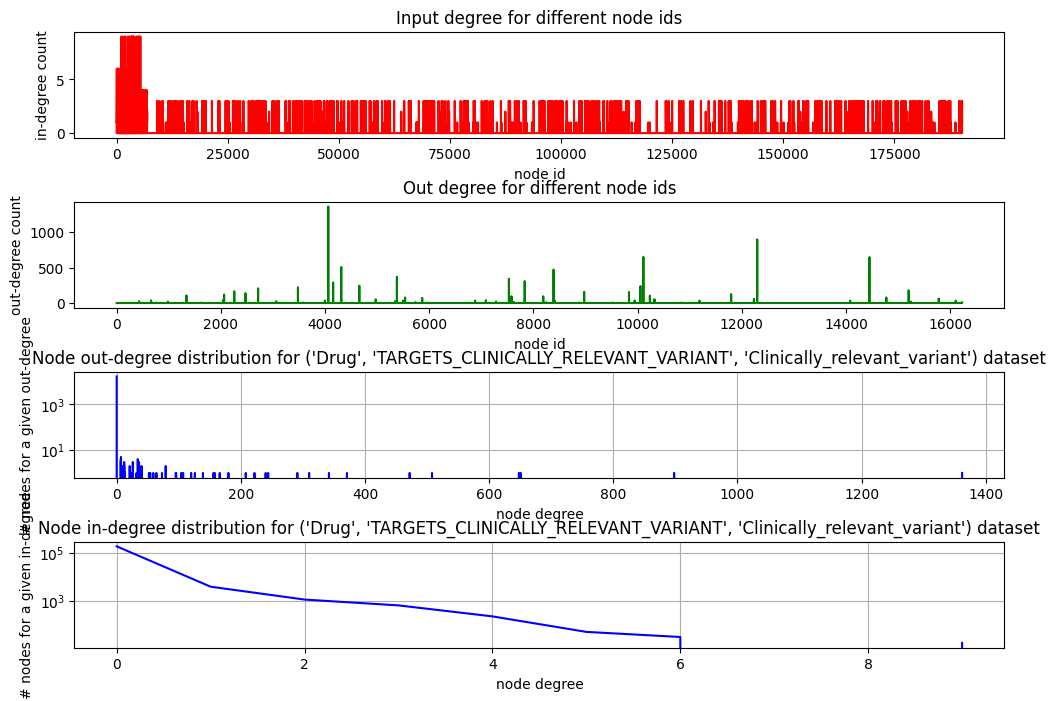

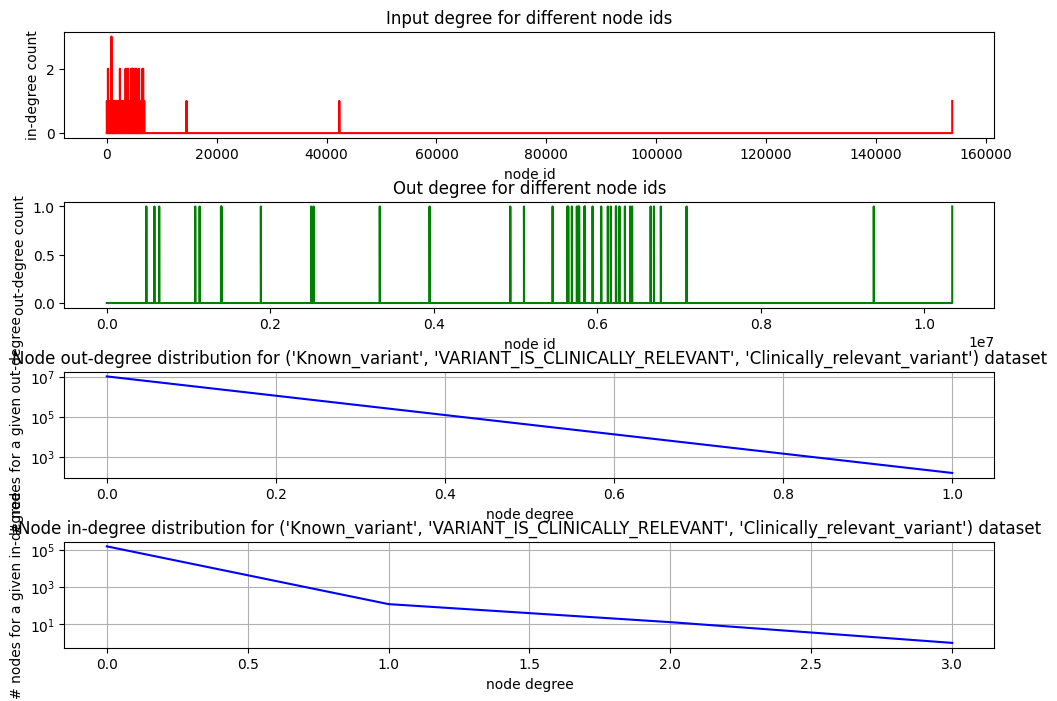

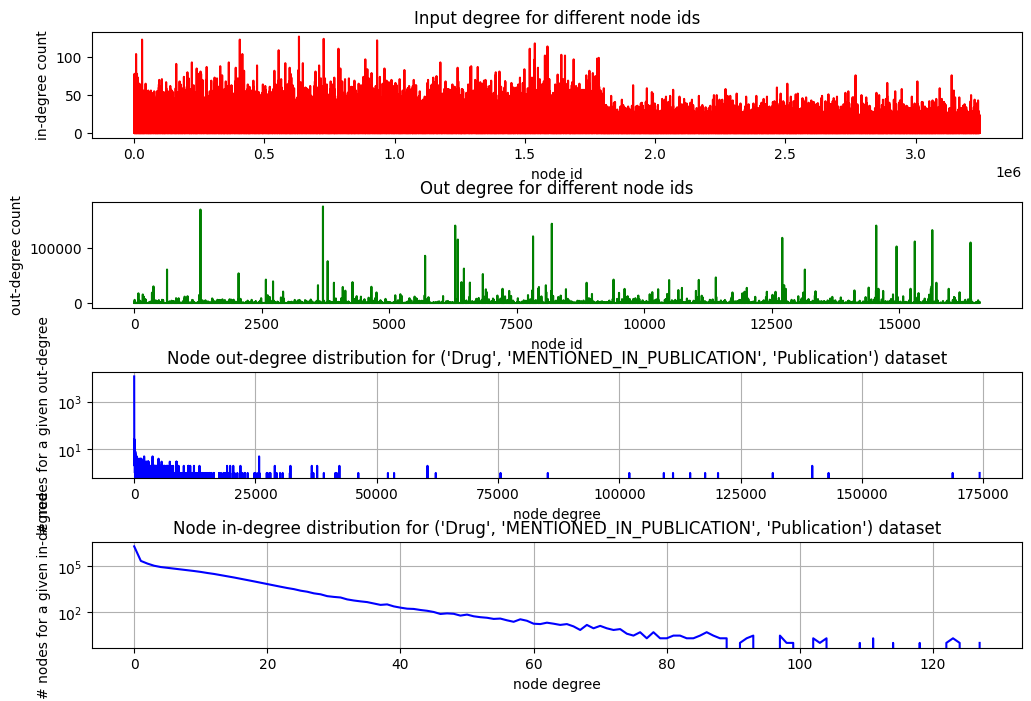

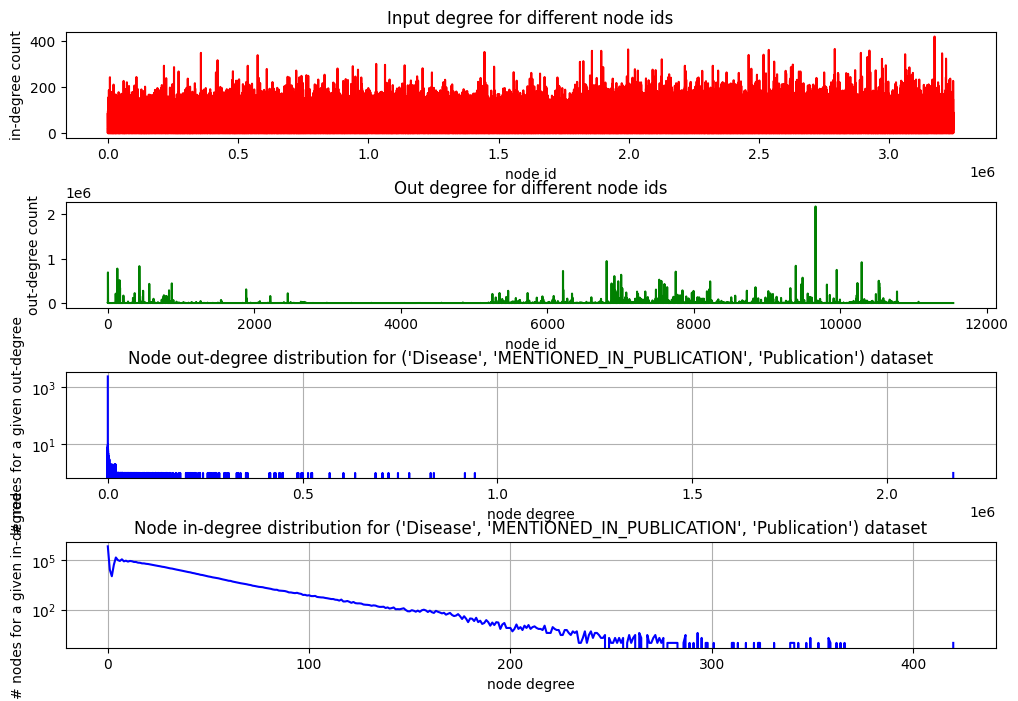

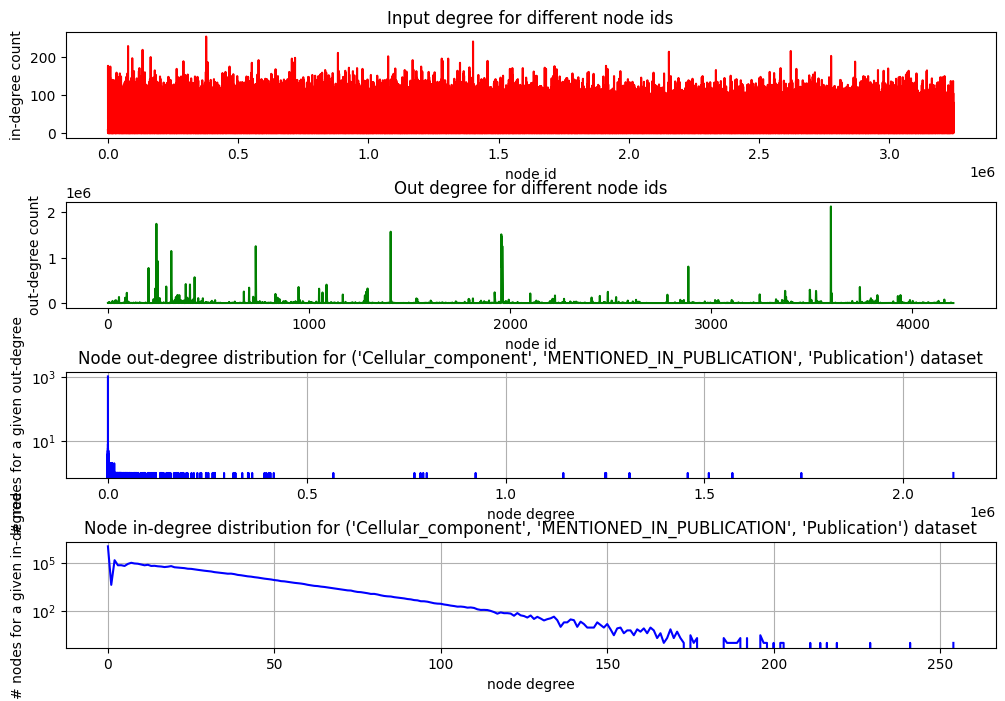

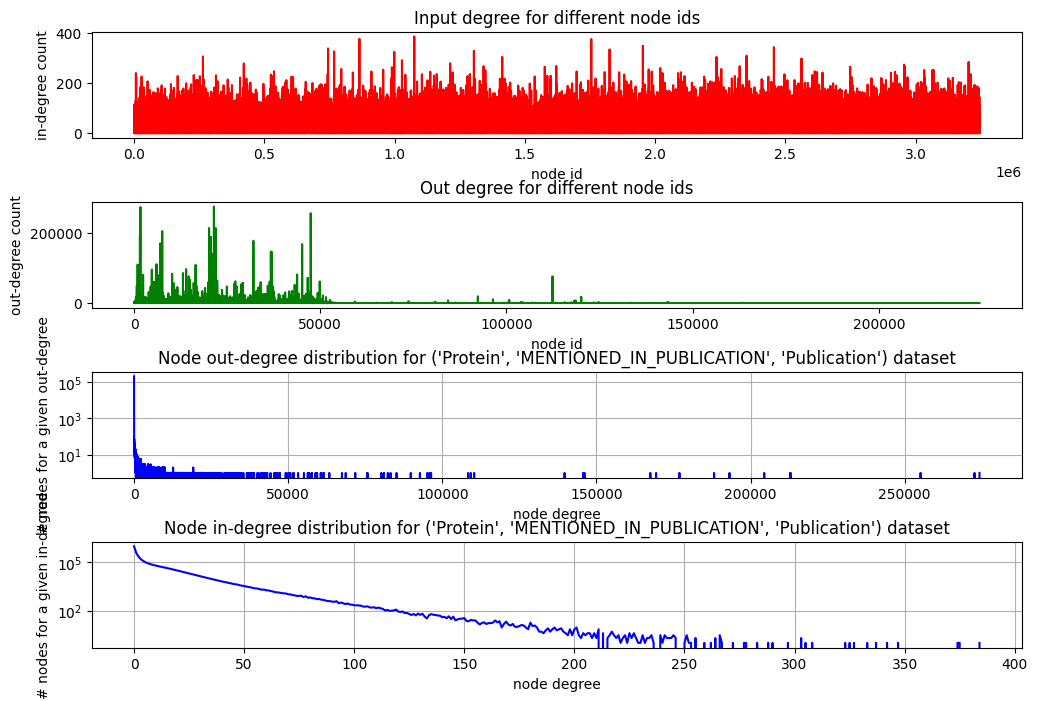

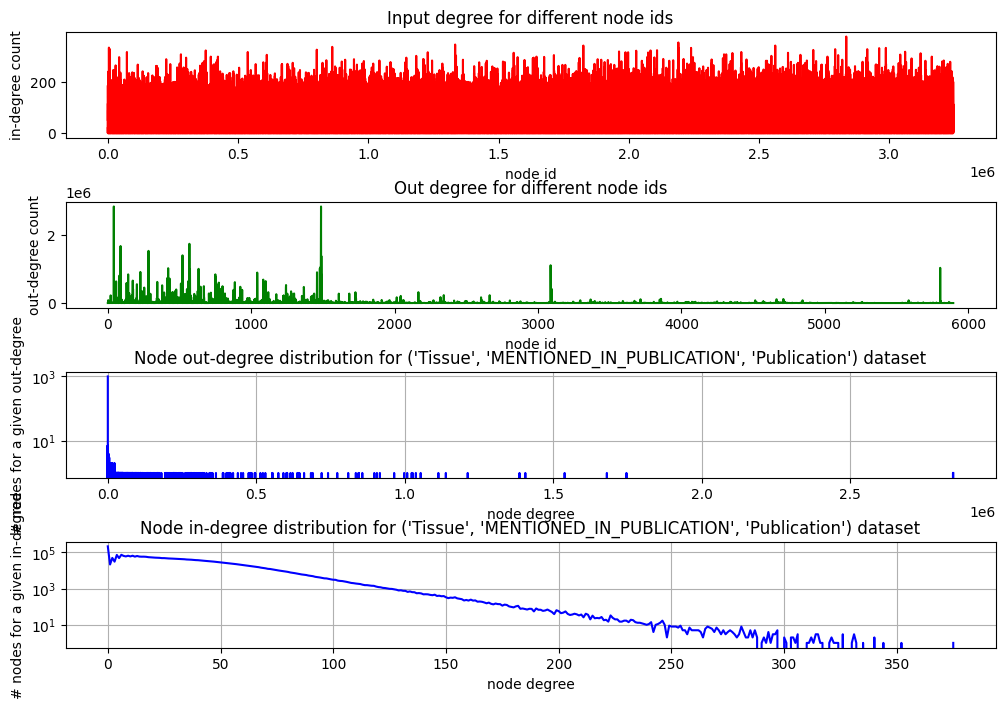

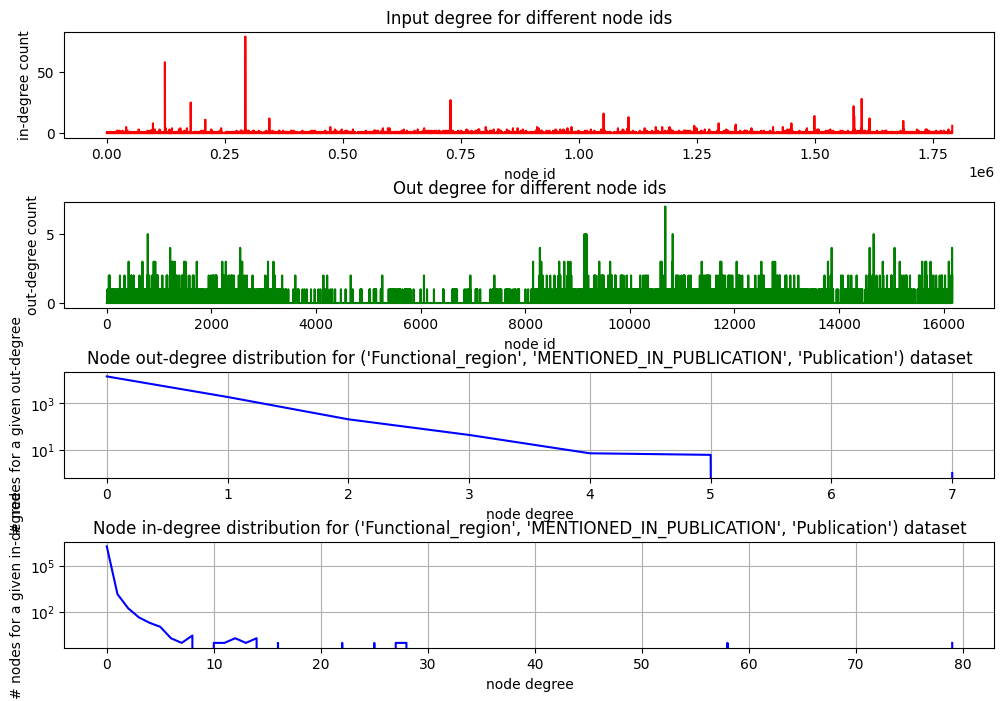

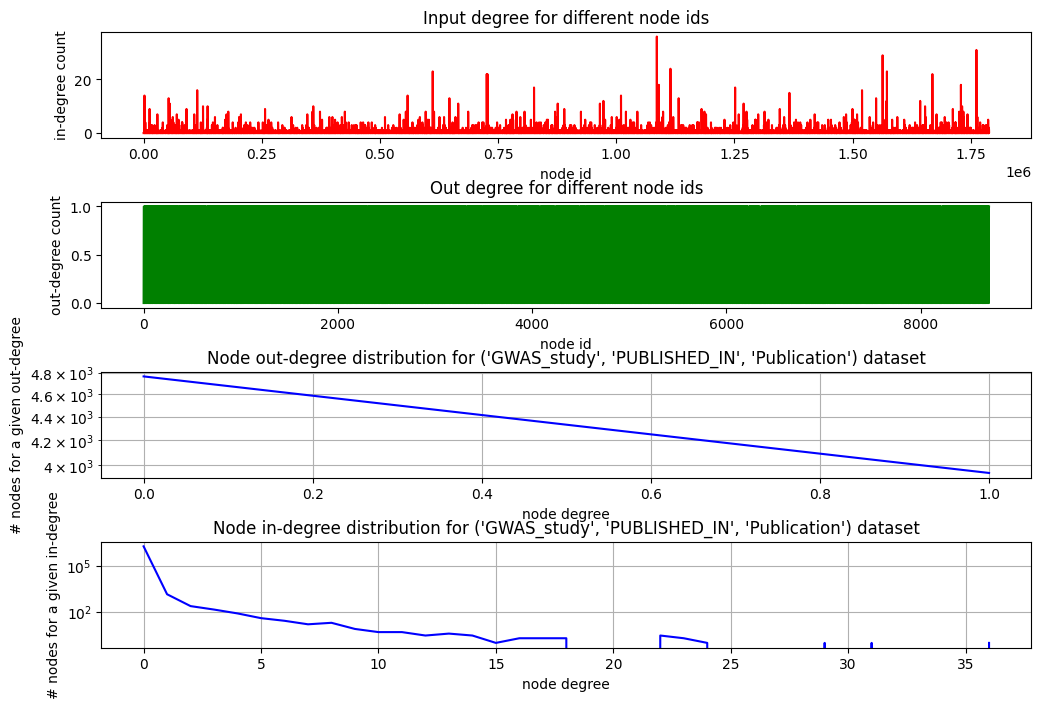

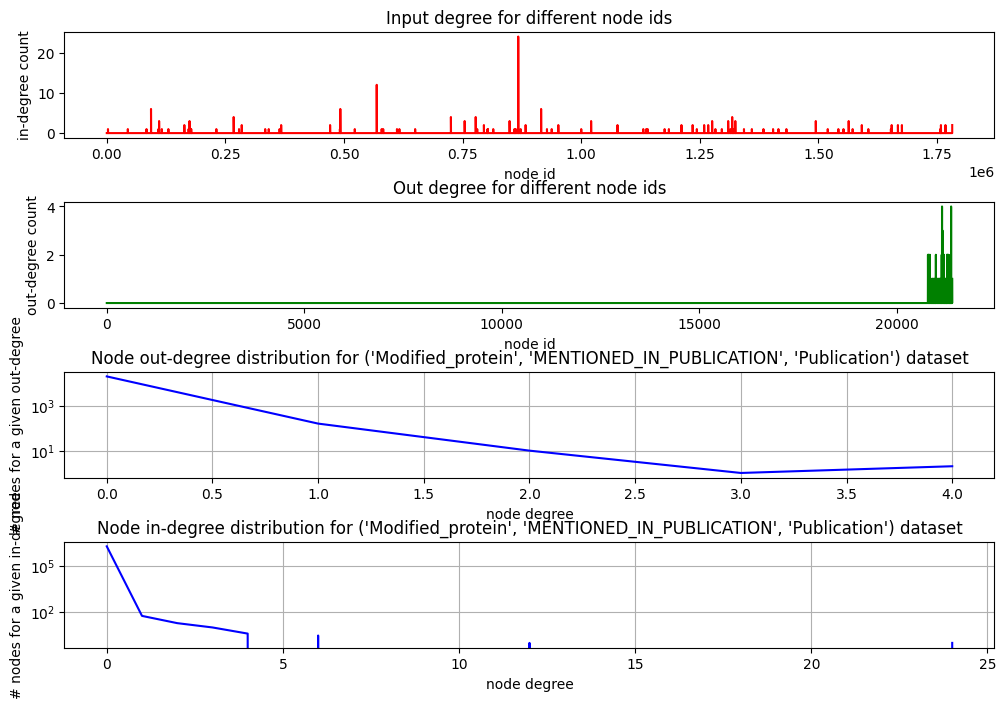

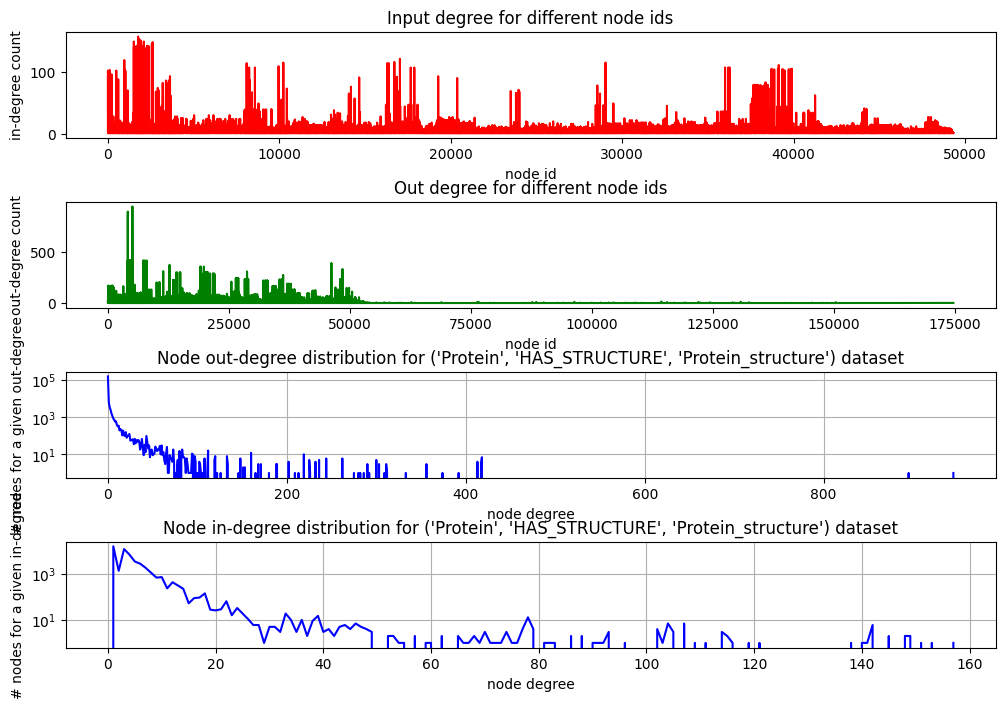

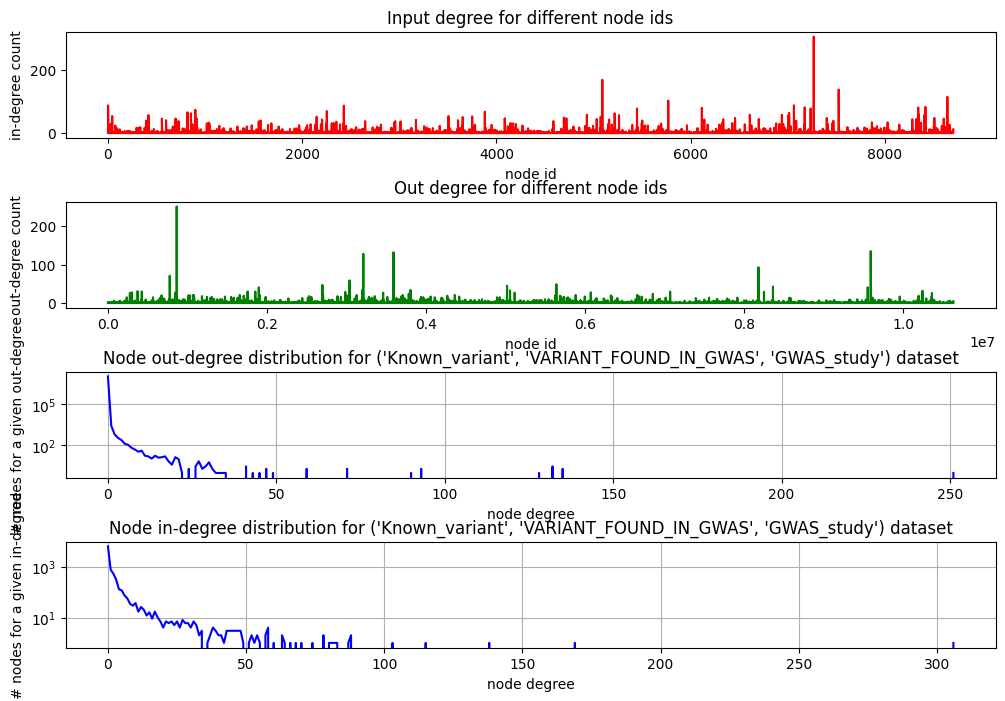

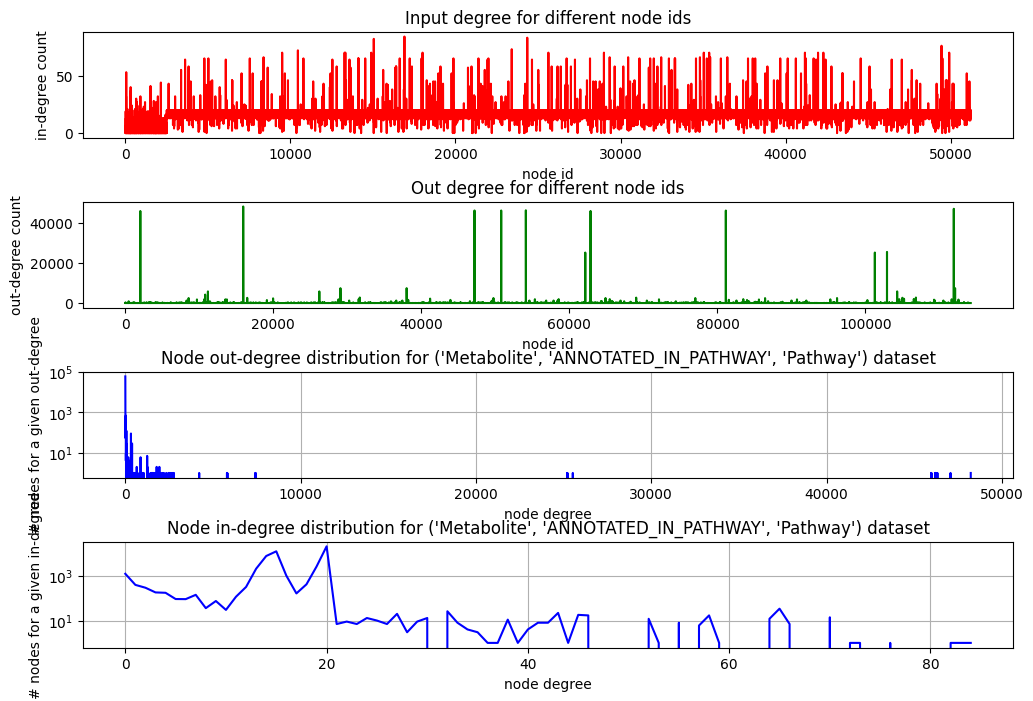

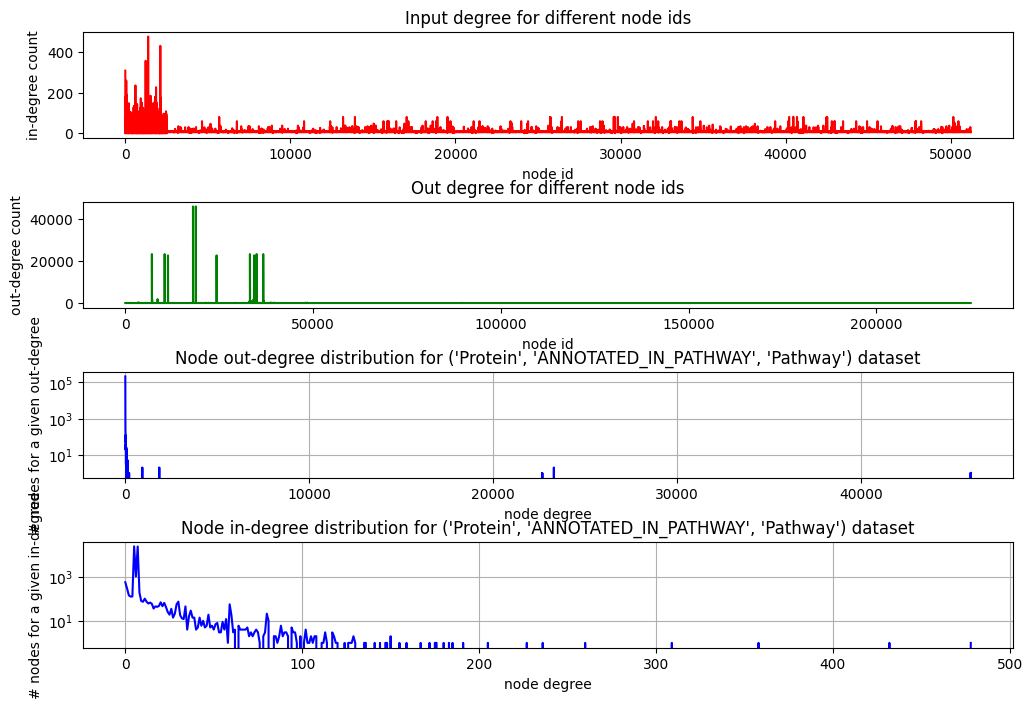

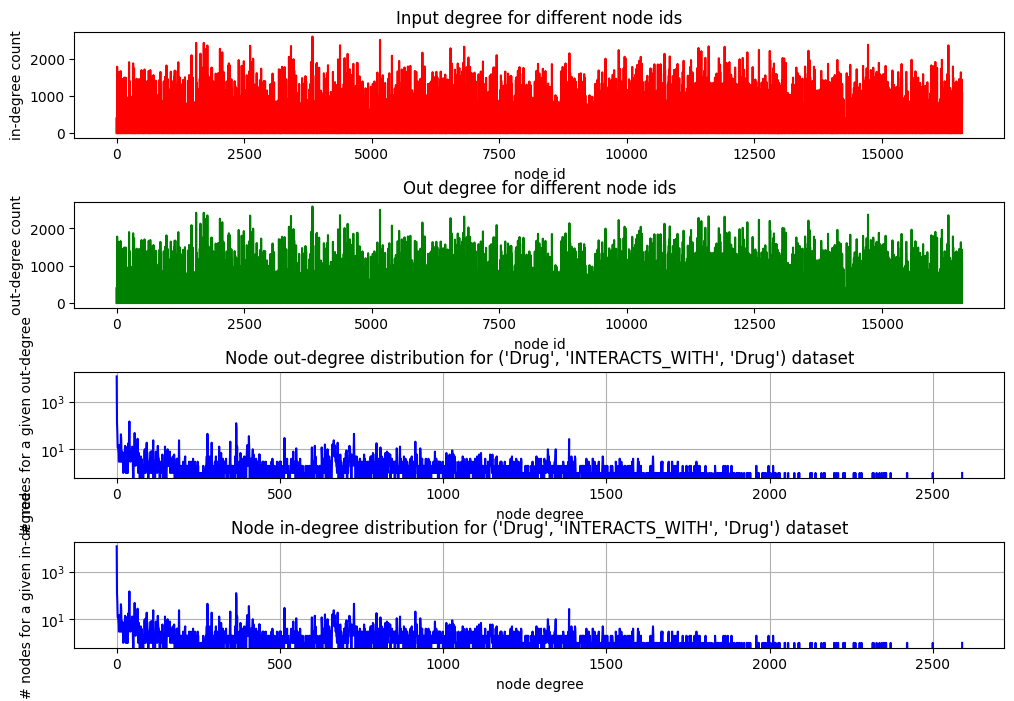

In [58]:
import numpy as np
for edge_type in graphRetriever.graph_object.edge_index_dict:
    plot_in_out_degree_distributions(np.array(graphRetriever.graph_object.edge_index_dict[edge_type]), str(edge_type))

In [60]:
from torch_geometric.utils import degree
edge_index = graphRetriever.graph_object.edge_index_dict[("Disease", "HAS_PARENT", "Disease")]
degree(edge_index[0])

NotImplementedError: 

In [ ]:
import pandas as pd

def edge_index_to_csv(edge_index, edge_type):
    df = pd.DataFrame(data= np.array(edge_index).transpose(), columns=["source", "target"])
    df.to_csv(f"data/{edge_type[0]}__{edge_type[1]}__{edge_type[2]}.csv", index=False)

In [ ]:
for edge_type in graphRetriever.graph_object.edge_index_dict:
    edge_index_to_csv(graphRetriever.graph_object.edge_index_dict[edge_type], edge_type)

In [59]:
graphRetriever.edge_types

[('Disease', 'HAS_PARENT', 'Disease'),
 ('Experimental_factor', 'MAPS_TO', 'Disease'),
 ('Modified_protein', 'ASSOCIATED_WITH', 'Disease'),
 ('Protein', 'ASSOCIATED_WITH', 'Disease'),
 ('Clinically_relevant_variant', 'ASSOCIATED_WITH', 'Disease'),
 ('Protein', 'IS_BIOMARKER_OF_DISEASE', 'Disease'),
 ('Metabolite', 'ASSOCIATED_WITH', 'Disease'),
 ('Protein', 'DETECTED_IN_PATHOLOGY_SAMPLE', 'Disease'),
 ('Project', 'STUDIES_DISEASE', 'Disease'),
 ('Tissue', 'HAS_PARENT', 'Tissue'),
 ('Protein', 'ASSOCIATED_WITH', 'Tissue'),
 ('Protein', 'IS_QCMARKER_IN_TISSUE', 'Tissue'),
 ('Project', 'STUDIES_TISSUE', 'Tissue'),
 ('Protein', 'ASSOCIATED_WITH', 'Biological_process'),
 ('Biological_process', 'HAS_PARENT', 'Biological_process'),
 ('Complex', 'ASSOCIATED_WITH', 'Biological_process'),
 ('Modified_protein', 'ASSOCIATED_WITH', 'Biological_process'),
 ('Protein', 'ASSOCIATED_WITH', 'Molecular_function'),
 ('Molecular_function', 'HAS_PARENT', 'Molecular_function'),
 ('Protein', 'ASSOCIATED_WITH'

In [28]:
import torch
edge_index = torch.tensor(graphRetriever.graph_object.edge_index_dict[('Disease',
  'HAS_PARENT',
  'Disease')], dtype=torch.long)

In [31]:
edge_index

tensor([[ 8419,  8408,  8405,  ..., 10145, 11546, 11545],
        [    0,     0,     0,  ..., 11543, 11544, 11544]])

In [37]:
from torch_geometric.utils import degree
out_degree = degree(edge_index[0])
in_degree = degree(edge_index[1])

<BarContainer object of 68 artists>

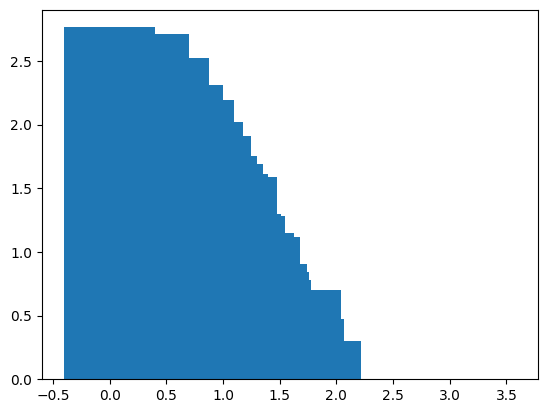

In [47]:
unique, counts = torch.unique(in_degree, return_counts=True)
plt.(torch.log10(unique), torch.log10(counts))

In [25]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 3.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 21.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 37.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 22.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 9.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━

In [26]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 10.6 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 49.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 43.1 MB/s eta 0:00:00
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.1/328.1 kB 37.2 MB/s eta 0:00:00


In [15]:
records, _, _  = graphRetriever.driver.execute_query(
            """
                MATCH (s:Protein)-[relationship:HAS_STRUCTURE]->(t:Protein_structure)
                RETURN count(relationship) AS num_edges
            """,
            database_=graphRetriever.database,
        )
print(records[0].data())

{'num_edges': 195640}
